# Naive and Ensemble Classifiers Methods

<div class="alert alert-block alert-warning">
  
<b>Notebook objectives:</b>
    
* Train difference types of naive and emsemble classifiers
    
    
* Conduct K-fold cross validation to the skill of the classifiers 
    

* Conduct hyper parameter tuning for classifier methods
    
    
* Compare the classifiers generalization based on AUC and Recall
    

# 1. Notebook set up

In [5]:
# Try downgrading pandas version if pickle throws an error while loading and reset kernel
# !pip install pandas==1.4.1

In [4]:
# if xgboost throws and error uncomment and install xgboost package and reset kernel
# !pip install xgboost

In [5]:
# install packages if error occurs and reset kernel
# !pip install imblearn

In [1]:
###### Import packages

### Data handling
import numpy as np
import pandas as pd
import datetime as dt
#from IPython.display import HTML, Image #display formatted texts
import warnings
warnings.filterwarnings('ignore')

### Plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn') # pretty graphs
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter, FuncFormatter
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


### Files to pickle
import pickle
import bz2
import _pickle as cPickle

### sampling
from sklearn.model_selection import train_test_split

### sk-learn pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


### Model selection

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# if xgboost throws and error uncomment and install xgboost package
# !pip install xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, to_graphviz

# Imbalancer Learn Pipeline
from imblearn.pipeline import Pipeline, make_pipeline

# Class Imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, CondensedNearestNeighbour, OneSidedSelection, NeighbourhoodCleaningRule, InstanceHardnessThreshold, TomekLinks
from collections import Counter

# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Scoring
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, average_precision_score, f1_score, make_scorer
from sklearn.inspection import partial_dependence

### Scipy stats
from scipy.stats import loguniform

### Time progress bar
from tqdm.notebook import tqdm_notebook
from tqdm import tqdm
import time

# Google path set up
pickles = "/content/drive/MyDrive/pickles/"
pickles_w1 = "/content/drive/MyDrive/pickles/w1/"
pickles_w2 = "/content/drive/MyDrive/pickles/w2/"
pickles_w3 = "/content/drive/MyDrive/pickles/w3/"
pickles_w4 = "/content/drive/MyDrive/pickles/w4/"
pickles_w5 = "/content/drive/MyDrive/pickles/w5/"
pickles_imbalance = "/content/drive/MyDrive/pickles/class_imbalance_learn/"
pickles_tuning = "/content/drive/MyDrive/pickles/tuning/"

# Path set up
path = "/project/data/"
path_w1 = "/project/data/w1/"
path_w2 = "/project/data/w2/"
path_w3 = "/project/data/w3/"
path_w4 = "/project/data/w4/"
path_w5 = "/project/data/w5/"
json_path = "/project/notebooks/map/KEYFILE.json"
path_feature = "/project/data/feature_importance/"
path_imbalance = "/project/data/class_imbalance_learn/"
path_tuning = "/project/data/tuning/"

# fixed values
seed = 2323
colors = {'c1':['blue', 'red'], 'c2': ['red', 'blue', 'grey', 'purple']}
bar_width = 0.3
bin_num = 25
size = {'small_tick': 9, 'tick': 10 , 'label': 14, 'sub_title': 16, 'main_title': 20}
fig_size = {'large': (30,25), 'small': (10, 5)}

# pandas display set up
pd.options.display.max_columns = None

# 2. Loading pre-processed 'X' and 'y'

In [3]:
# Loading X
pickled_data_X = bz2.BZ2File(path_w2 + 'X_train_sparse_w2_1pct', 'rb')
X_train = cPickle.load(pickled_data_X)
pickled_data_X.close()
print(F"X_train shape: rows {X_train.shape[0]}, columns {X_train.shape[1]}")

X_train shape: rows 338282, columns 4075


In [2]:
# Loading X
pickled_data_X = bz2.BZ2File(path_w2 + 'X_train_dense_w2_1pct', 'rb')
X_train = cPickle.load(pickled_data_X)
pickled_data_X.close()
print(F"X_train shape: rows {X_train.shape[0]}, columns {X_train.shape[1]}")

X_train shape: rows 338282, columns 304


In [3]:
# Loading y (target)
pickled_data_y = bz2.BZ2File(path_w2 + 'y_train_dense_w2_1pct', 'rb')
y_train = cPickle.load(pickled_data_y)
pickled_data_y.close()
print(F"y_train shape: rows {y_train.shape[0]}, columns 1")
# y_train = np.array(y_train)

y_train shape: rows 338282, columns 1


In [4]:
# Loading X test
pickled_data_X = bz2.BZ2File(path_w2 + 'X_test_dense_w2_1pct', 'rb')
X_test = cPickle.load(pickled_data_X)
pickled_data_X.close()
print(F"X_train shape: rows {X_test.shape[0]}, columns {X_test.shape[1]}")

X_train shape: rows 59697, columns 304


In [5]:
# Loading y test
pickled_data_y = bz2.BZ2File(path_w2 + 'y_test_dense_w2_1pct', 'rb')
y_test = cPickle.load(pickled_data_y)
pickled_data_y.close()
print(F"y_train shape: rows {y_test.shape[0]}, columns 1")
# y_train = np.array(y_train)

y_train shape: rows 59697, columns 1


### Class imbalance over and under sampling

From testing class imbalance methods, there's evidence that applying over and under sampling generate an easier to comprenhed decisoin boundary which translates in a higher recall score (i.e., higher classificaction power on the target class). Thus, a pipeline of an over and under sampling method is defined to conduct hyperparameter tuning.


In [6]:
# Define pipeline
over_sampler = SMOTE(k_neighbors=8, sampling_strategy=0.1, random_state = seed)
under_sampler = RandomUnderSampler(sampling_strategy=0.5, random_state = seed)

steps = [('over', over_sampler), ('under', under_sampler)]
pipeline = Pipeline(steps=steps)

# 3. Model definition

### 3.1 Logistic regression

In [49]:
# defining ligistic regression
clf_1 = LogisticRegression(random_state = seed)

In [50]:
clf_1.fit(X_train, y_train)

LogisticRegression(random_state=2323)

#### 3.1.1 Logistic regression | hyper parameter tuning



In [ ]:
##### Grid search for classifier

# Defining classifier
classifier = clf_1

# Define hyperparameter search space
solvers = ['newton-cg','lbfgs', 'liblinear']
penalty = ['l2'] # , 'l2', 'elasticnet'
c_values = [10, 1.0, 1e-1, 1e-2]
search_space_clf1 = dict(solver=solvers,penalty=penalty,C=c_values)

scoring = {'auc': 'roc_auc', 'recall':'recall'} #'F1': 'f1_micro', 'Precision': 'precision', 

# scoring = {'auc' : make_scorer(roc_auc_score, needs_proba = True, average = 'macro'),
#            'recall' : make_scorer(recall_score, average = 'micro')}

# Define grid search
kfold_cv = StratifiedKFold(n_splits = 5, random_state = seed, shuffle = True)
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=search_space_clf1, 
                           cv=kfold_cv, n_jobs=-1, 
                           scoring=scoring, 
                           refit='auc', 
                           verbose = 10) #scoring, refit='auc',
grid_result = grid_search.fit(X_train, y_train)

# Get results
best_res_clf1_grid = grid_result.best_score_
best_params_clf1_grid = grid_result.best_params_
mean_auc_clf1_grid = grid_result.cv_results_['mean_test_auc']
std_auc_clf1_grid = grid_result.cv_results_['std_test_auc']
mean_rec_clf1_grid = grid_result.cv_results_['mean_test_recall']
std_rec_clf1_grid = grid_result.cv_results_['std_test_recall']
params_clf1_grid = grid_result.cv_results_['params']

print(F"Best auc score: {grid_result.best_score_:.4%}\nBest parameters: {grid_result.best_params_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best auc score: 67.1762%
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
##### Export grid search results
# Define results as dfs
# sumamry df
clf1_grid_summary = pd.DataFrame()
clf1_grid_summary['mean_auc'] = list(mean_auc_clf1_grid)
clf1_grid_summary['std_auc'] = list(std_auc_clf1_grid)
clf1_grid_summary['mean_recall'] = list(mean_rec_clf1_grid)
clf1_grid_summary['std_recall'] = list(std_rec_clf1_grid)

clf1_grid_search_values = pd.DataFrame(params_clf1_grid)
clf6_grid_summary['penalty'] = clf1_grid_search_values['penalty']
clf6_grid_summary['solver'] = clf1_grid_search_values['solver']
clf6_grid_summary['C'] = clf1_grid_search_values['C']

# Best hyper-parameters
clf1_grid_best = pd.DataFrame([best_params_clf1_grid])

clf_export = [('clf1_grid_summary',clf1_grid_summary),('clf1_grid_best',clf1_grid_best), ('clf1_grid_search_values',clf1_grid_search_values)]

# Export to csv
for df in clf_export:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

In [ ]:
# Defining classifier
classifier = clf_1

## Fitting pipeline to get transformed X and y
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Define hyperparameter search space
solvers = ['newton-cg']
penalty = ['l2'] # , 'l2', 'elasticnet'
c_values = loguniform(1e-3, 1e-2)

search_space_clf1 = dict(solver=solvers,penalty=penalty,C=c_values)

# Define scoring metrics

scoring = {'auc': 'roc_auc', 'recall':'recall'} #'F1': 'f1_micro', 'Precision': 'precision', 

# scoring = {'auc' : make_scorer(roc_auc_score, needs_proba = True, average = 'macro'),
#            'recall' : make_scorer(recall_score, average = 'macro')}

# Define grid search
kfold_cv = StratifiedKFold(n_splits = 5, random_state = seed, shuffle = True)
random_search = RandomizedSearchCV(estimator=classifier, 
                                   param_distributions = search_space_clf1, 
                                   cv = kfold_cv, 
                                   n_iter=10, 
                                   n_jobs=-1, 
                                   scoring=scoring, 
                                   refit='auc', 
                                   verbose = 10) #scoring, refit='auc',
random_result = random_search.fit(X_train, y_train)

# Get results
best_res_clf1_rand = random_result.best_score_
best_params_clf1_rand = random_result.best_params_
mean_auc_clf1_rand = random_result.cv_results_['mean_test_auc']
std_auc_clf1_rand = random_result.cv_results_['std_test_auc']
mean_rec_clf1_rand = random_result.cv_results_['mean_test_recall']
std_rec_clf1_rand = random_result.cv_results_['std_test_recall']
params_clf1_rand = random_result.cv_results_['params']

#cl1_params_tuned = best_params_clf1
print(F"Best auc score random: {random_result.best_score_:.4%}\nBest parameters random: {random_result.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best auc score random: 67.1482%
Best parameters random: {'C': 0.00847079745822377, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
##### Export random search results
# Define results as dfs
# sumamry df
clf1_rand_summary = pd.DataFrame()
clf1_rand_summary['mean_auc'] = list(mean_auc_clf1_rand)
clf1_rand_summary['std_auc'] = list(std_auc_clf1_rand)
clf1_rand_summary['mean_recall'] = list(mean_rec_clf1_rand)
clf1_rand_summary['std_recall'] = list(std_rec_clf1_rand)

clf1_rand_search_values = pd.DataFrame(params_clf1_rand)
clf1_rand_summary['penalty'] = clf1_rand_search_values['penalty']
clf1_rand_summary['solver'] = clf1_rand_search_values['solver']
clf1_rand_summary['C'] = clf1_rand_search_values['C']

# Best hyper-parameters
clf1_rand_best = pd.DataFrame([best_params_clf1_rand])

clf_export = [('clf1_rand_summary',clf1_rand_summary),('clf1_rand_best',clf1_rand_best), ('clf1_rand_search_values',clf1_rand_search_values)]

# Export to csv
for df in clf_export:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

In [51]:
# load tuned params
clf_1_tuned_params = pd.read_csv(path_tuning + 'clf1_grid_best.csv')

# Defining tuned classifier Logistic Regression
clf_1_tuned = LogisticRegression(C = clf_1_tuned_params['C'][0], 
                           penalty = clf_1_tuned_params['penalty'][0], 
                           solver = clf_1_tuned_params['solver'][0],
                           random_state = seed)

# Fitting tuned classifier LR
clf_1_tuned.fit(X_train,y_train)

LogisticRegression(C=0.01, random_state=2323, solver='newton-cg')

### 3.2 Naive Bayes Classifier

In [52]:
clf_2 = GaussianNB()

In [53]:
clf_2.fit(X_train, y_train)

GaussianNB()

#### 3.2.1 GBC | hyper parameter tuning

In [ ]:
##### Grid search for classifier

# Defining classifier
classifier = clf_2

smoothing = [1e-9, 1e-6, 1e-3, 1e-1, 1]

# define grid search
search_space_clf2 = dict(var_smoothing=smoothing)

# Define scorers

scoring = {'auc': 'roc_auc', 'recall':'recall'} #'F1': 'f1_micro', 'Precision': 'precision', 

# scoring = {'auc' : make_scorer(roc_auc_score, needs_proba = True, average = 'macro'),
#            'recall' : make_scorer(recall_score, average = 'micro')}

# Define grid search
kfold_cv = StratifiedKFold(n_splits = 5, random_state = seed, shuffle = True)
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=search_space_clf2, 
                           cv=kfold_cv, 
                           n_jobs=-1, 
                           scoring=scoring, 
                           refit='auc', 
                           verbose = 10) #scoring, refit='auc',
grid_result = grid_search.fit(X_train, y_train)

# Get results
best_res_clf2_grid = grid_result.best_score_
best_params_clf2_grid = grid_result.best_params_
mean_auc_clf2_grid = grid_result.cv_results_['mean_test_auc']
std_auc_clf2_grid = grid_result.cv_results_['std_test_auc']
mean_rec_clf2_grid = grid_result.cv_results_['mean_test_recall']
std_rec_clf2_grid = grid_result.cv_results_['std_test_recall']
params_clf2_grid = grid_result.cv_results_['params']

print(F"Best auc score: {grid_result.best_score_:.4%}\nBest parameters: {grid_result.best_params_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best auc score: 67.0697%
Best parameters: {'var_smoothing': 1}


In [ ]:
##### Export grid search results
# Define results as dfs
# sumamry df
clf2_grid_summary = pd.DataFrame()
clf2_grid_summary['mean_auc'] = list(mean_auc_clf2_grid)
clf2_grid_summary['std_auc'] = list(std_auc_clf2_grid)
clf2_grid_summary['mean_recall'] = list(mean_rec_clf2_grid)
clf2_grid_summary['std_recall'] = list(std_rec_clf2_grid)


clf2_grid_search_values = pd.DataFrame(params_clf2_grid)
clf2_grid_summary['var_smoothing'] = clf2_grid_search_values['var_smoothing']

# Best hyper-parameters
clf2_grid_best = pd.DataFrame([best_params_clf2_grid])

clf_export = [('clf2_grid_summary',clf2_grid_summary),('clf2_grid_best',clf2_grid_best), ('clf2_grid_search_values',clf2_grid_search_values)]

# Export to csv
for df in clf_export:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

In [ ]:
##### Random search for classifier

# Defining classifier
classifier = clf_2

# Define hyperparameter search space
smoothing = loguniform(1, 5)

search_space_clf2 = dict(var_smoothing=smoothing)

# Define scoring metrics
scoring = {'auc': 'roc_auc', 'recall':'recall'} #'F1': 'f1_micro', 'Precision': 'precision', 

# scoring = {'auc' : make_scorer(roc_auc_score, needs_proba = True, average = 'macro'),
#            'recall' : make_scorer(recall_score, average = 'macro')}

# Define random search
kfold_cv = StratifiedKFold(n_splits = 5, random_state = seed, shuffle = True)
random_search = RandomizedSearchCV(estimator=classifier, 
                                   param_distributions = search_space_clf2, 
                                   cv = kfold_cv, 
                                   n_iter=10, 
                                   n_jobs=-1, 
                                   scoring=scoring, 
                                   refit='auc', 
                                   verbose = 10) #scoring, refit='auc',
random_result = random_search.fit(X_train, y_train)

# Get results
best_res_clf2_rand = random_result.best_score_
best_params_clf2_rand = random_result.best_params_
mean_auc_clf2_rand = random_result.cv_results_['mean_test_auc']
std_auc_clf2_rand = random_result.cv_results_['std_test_auc']
mean_rec_clf2_rand = random_result.cv_results_['mean_test_recall']
std_rec_clf2_rand = random_result.cv_results_['std_test_recall']
params_clf2_rand = random_result.cv_results_['params']

print(F"Best auc score random: {random_result.best_score_:.4%}\nBest parameters random: {random_result.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best auc score random: 67.6738%
Best parameters random: {'var_smoothing': 2.765244275978442}


In [ ]:
##### Export random search results
# Define results as dfs
# sumamry df
clf2_rand_summary = pd.DataFrame()
clf2_rand_summary['mean_auc'] = list(mean_auc_clf2_rand)
clf2_rand_summary['std_auc'] = list(std_auc_clf2_rand)
clf2_rand_summary['mean_recall'] = list(mean_rec_clf2_rand)
clf2_rand_summary['std_recall'] = list(std_rec_clf2_rand)

clf2_rand_search_values = pd.DataFrame(params_clf2_rand)
clf2_rand_summary['var_smoothing'] = clf2_rand_search_values['var_smoothing']

# Best hyper-parameters
clf2_rand_best = pd.DataFrame([best_params_clf2_rand])

clf5_export = [('clf2_rand_best',clf2_rand_best),('clf2_rand_summary',clf2_rand_summary), ('clf2_rand_search_values',clf2_rand_search_values)]

# Export to csv
for df in clf5_export:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

In [54]:
# load tuned params
clf_2_tuned_params = pd.read_csv(path_tuning + 'clf2_rand_best.csv')

# define tuned classifier GNB
clf_2_tuned = GaussianNB(var_smoothing=round(clf_2_tuned_params['var_smoothing'][0],2))

# fit tuned classifier GNB
clf_2_tuned.fit(X_train,y_train)

GaussianNB(var_smoothing=2.77)

### 3.3 Random Forest Classifier

In [55]:
# defining Random Forest
clf_3 = RandomForestClassifier(random_state = seed)

In [56]:
clf_3.fit(X_train, y_train)

RandomForestClassifier(random_state=2323)

#### 3.3.1 Random Forest | hyper parameter tuning

In [ ]:
##### Grid search for classifier

# Defining classifier
classifier = clf_3

# Define hyperparameter search space
criterion = ['gini', 'entropy']
max_depth = [10, 50, 100]
n_estimators = [10, 50, 100]
# max_features = ['sqrt', 'log2']

search_space_clf3 = dict(max_depth=max_depth, n_estimators=n_estimators, criterion=criterion)

scoring = {'auc': 'roc_auc', 'recall':'recall'} #'F1': 'f1_micro', 'Precision': 'precision', 

# scoring = {'auc' : make_scorer(roc_auc_score, needs_proba = True, average = 'macro'),
#            'recall' : make_scorer(recall_score, average = 'macro')}
           
# Define grid search
kfold_cv = StratifiedKFold(n_splits = 5, random_state = seed, shuffle = True)
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=search_space_clf3, 
                           cv=kfold_cv, 
                           n_jobs=-1, 
                           scoring=scoring, 
                           refit='auc', 
                           verbose = 10) #scoring, refit='auc',
grid_result = grid_search.fit(X_train, y_train)

# Get results
best_res_clf3_grid = grid_result.best_score_
best_params_clf3_grid = grid_result.best_params_
mean_auc_clf3_grid = grid_result.cv_results_['mean_test_auc']
std_auc_clf3_grid = grid_result.cv_results_['std_test_auc']
mean_rec_clf3_grid = grid_result.cv_results_['mean_test_recall']
std_rec_clf3_grid = grid_result.cv_results_['std_test_recall']
params_clf3_grid = grid_result.cv_results_['params']

print(F"Best auc score: {grid_result.best_score_:.4%}\nBest parameters: {grid_result.best_params_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best auc score: 71.1677%
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}


In [ ]:
##### Export grid search results
# Define results as dfs
# sumamry df
clf3_grid_summary = pd.DataFrame()
clf3_grid_summary['mean_auc'] = list(mean_auc_clf3_grid)
clf3_grid_summary['std_auc'] = list(std_auc_clf3_grid)
clf3_grid_summary['mean_recall'] = list(mean_rec_clf3_grid)
clf3_grid_summary['std_recall'] = list(std_rec_clf3_grid)

clf3_grid_search_values = pd.DataFrame(params_clf3_grid)
clf3_grid_summary['criterion'] = clf3_grid_search_values['criterion']
clf3_grid_summary['max_depth'] = clf3_grid_search_values['max_depth']
clf3_grid_summary['n_estimators'] = clf3_grid_search_values['n_estimators']

# Best hyper-parameters
clf3_grid_best = pd.DataFrame([best_params_clf3_grid])

clf_export = [('clf3_grid_summary',clf3_grid_summary),('clf3_grid_best',clf3_grid_best), ('clf3_grid_search_values',clf3_grid_search_values)]

# Export to csv
for df in clf_export:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

In [39]:
##### Random search for classifier

# Defining classifier
classifier = clf_3

# Define hyperparameter search space
criterion = ['entropy']
max_depth = range(10, 49, 5)
n_estimators = range(100, 150, 10)
class_weight= ['balanced', 'balanced_subsample']

search_space_clf3 = dict(criterion=criterion, max_depth=max_depth, n_estimators=n_estimators,class_weight=class_weight)

scoring = {'auc': 'roc_auc', 'recall':'recall', 'precision': 'precision'}

# scoring = {'auc' : make_scorer(roc_auc_score, needs_proba = True, average = 'macro'),
#            'recall' : make_scorer(recall_score, average = 'macro')}

           
# Define random search
kfold_cv = StratifiedKFold(n_splits = 2, random_state = seed, shuffle = True)
random_search = RandomizedSearchCV(estimator=classifier, 
                                   param_distributions = search_space_clf3, 
                                   cv = kfold_cv, 
                                   n_iter=10, 
                                   n_jobs=-1, 
                                   scoring=scoring, 
                                   refit='auc', 
                                   verbose = 10) #scoring, refit='auc',
random_result = random_search.fit(X_train, y_train)

# Get results
best_res_clf3_rand = random_result.best_score_
best_params_clf3_rand = random_result.best_params_
mean_auc_clf3_rand = random_result.cv_results_['mean_test_auc']
std_auc_clf3_rand = random_result.cv_results_['std_test_auc']
mean_rec_clf3_rand = random_result.cv_results_['mean_test_recall']
std_rec_clf3_rand = random_result.cv_results_['std_test_recall']
params_clf3_rand = random_result.cv_results_['params']


print(F"Best auc score random: {random_result.best_score_:.4%}\nBest parameters random: {random_result.best_params_}")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best auc score random: 64.8455%
Best parameters random: {'n_estimators': 110, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}


In [41]:
##### Export random search results
# Define results as dfs
# sumamry df
clf3_rand_summary = pd.DataFrame()
clf3_rand_summary['mean_auc'] = list(mean_auc_clf3_rand)
clf3_rand_summary['std_auc'] = list(std_auc_clf3_rand)
clf3_rand_summary['mean_recall'] = list(mean_rec_clf3_rand)
clf3_rand_summary['std_recall'] = list(std_rec_clf3_rand)

clf3_rand_search_values = pd.DataFrame(params_clf3_rand)
clf3_rand_summary['criterion'] = clf3_rand_search_values['criterion']
clf3_rand_summary['max_depth'] = clf3_rand_search_values['max_depth']
clf3_rand_summary['n_estimators'] = clf3_rand_search_values['n_estimators']
clf3_rand_summary['class_weight'] = clf3_rand_search_values['class_weight']

# Best hyper-parameters
clf3_rand_best = pd.DataFrame([best_params_clf3_rand])

clf_export = [('clf3_rand_summary',clf3_rand_summary),('clf3_rand_best',clf3_rand_best), ('clf3_rand_search_values',clf3_rand_search_values)]

# Export to csv
for df in clf_export:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

In [57]:
# load tuned params
clf_3_tuned_params = pd.read_csv(path_tuning + 'clf3_rand_best.csv')

# Define tuned classifier RF
clf_3_tuned = RandomForestClassifier(criterion = clf_3_tuned_params['criterion'][0], 
                               max_depth = round(clf_3_tuned_params['max_depth'][0],0), 
                               n_estimators = clf_3_tuned_params['n_estimators'][0],                            
                               class_weight=clf_3_tuned_params['class_weight'][0], # class_weight='balanced_subsample'
                               random_state = seed)

# Fit tuned classifier RF
clf_3_tuned.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=110, random_state=2323)

### 3.4 AdaBoost Classifier

In [58]:
clf_4 = AdaBoostClassifier(random_state = seed)

In [59]:
clf_4.fit(X_train, y_train)

AdaBoostClassifier(random_state=2323)

#### 3.4.1 AdaBoost Classifier | hyper parameter tuning

In [ ]:
##### Grid search for classifier

# Defining classifier
classifier = clf_4

# Define hyperparameter search space
n_estimators = [10, 50, 100]
learning_rate = [1e-3, 1e-1, 1]

search_space_clf4 = dict(n_estimators=n_estimators, learning_rate=learning_rate)

scoring = {'auc': 'roc_auc', 'recall':'recall', 'precision': 'precision'}

# scoring = {'auc' : make_scorer(roc_auc_score, needs_proba = True, average = 'macro'),
#            'recall' : make_scorer(recall_score, average = 'macro')}
           
# Define grid search
kfold_cv = StratifiedKFold(n_splits = 5, random_state = seed, shuffle = True)
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=search_space_clf4, 
                           cv=kfold_cv, 
                           n_jobs=-1, 
                           scoring=scoring, 
                           refit='auc', 
                           verbose = 10) #scoring, refit='auc',
grid_result = grid_search.fit(X_train, y_train)

# Get results
best_res_clf4_grid = grid_result.best_score_
best_params_clf4_grid = grid_result.best_params_
mean_auc_clf4_grid = grid_result.cv_results_['mean_test_auc']
std_auc_clf4_grid = grid_result.cv_results_['std_test_auc']
mean_rec_clf4_grid = grid_result.cv_results_['mean_test_recall']
std_rec_clf4_grid = grid_result.cv_results_['std_test_recall']
params_clf4_grid = grid_result.cv_results_['params']

print(F"Best auc score: {grid_result.best_score_:.4%}\nBest parameters: {grid_result.best_params_}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best auc score: 65.5869%
Best parameters: {'learning_rate': 1, 'n_estimators': 50}


In [ ]:
##### Export grid search results
# Define results as dfs
# sumamry df
clf4_grid_summary = pd.DataFrame()
clf4_grid_summary['mean_auc'] = list(mean_auc_clf4_grid)
clf4_grid_summary['std_auc'] = list(std_auc_clf4_grid)
clf4_grid_summary['mean_recall'] = list(mean_rec_clf4_grid)
clf4_grid_summary['std_recall'] = list(std_rec_clf4_grid)

clf4_grid_search_values = pd.DataFrame(params_clf4_grid)
clf4_grid_summary['n_estimators'] = clf4_grid_search_values['n_estimators']
clf4_grid_summary['learning_rate'] = clf4_grid_search_values['learning_rate']

# Best hyper-parameters
clf4_rand_best = pd.DataFrame([best_params_clf4_grid])

clf_export = [('clf4_grid_summary',clf4_grid_summary),('clf4_rand_best',clf4_rand_best), ('clf4_grid_search_values',clf4_grid_search_values)]

# Export to csv
for df in clf_export:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

In [ ]:
##### Random search for classifier

# Defining classifier
classifier = clf_4

# Define hyperparameter search space
n_estimators = range(50, 100, 15)
learning_rate = loguniform(1e-1, 1)

search_space_clf4 = dict(n_estimators=n_estimators, learning_rate=learning_rate)

scoring = {'auc': 'roc_auc', 'recall':'recall', 'precision': 'precision'}

# scoring = {'auc' : make_scorer(roc_auc_score, needs_proba = True, average = 'macro'),
#            'recall' : make_scorer(recall_score, average = 'macro')}
           
# Define random search
kfold_cv = StratifiedKFold(n_splits = 5, random_state = seed, shuffle = True)
random_search = RandomizedSearchCV(estimator=classifier, 
                                   param_distributions = search_space_clf4, 
                                   cv = kfold_cv, 
                                   n_iter=10, 
                                   n_jobs=-1, 
                                   scoring=scoring, 
                                   refit='auc', 
                                   verbose = 10) #scoring, refit='auc',
random_result = random_search.fit(X_train, y_train)

# Get results
best_res_clf4_rand = random_result.best_score_
best_params_clf4_rand = random_result.best_params_
mean_auc_clf4_rand = random_result.cv_results_['mean_test_auc']
std_auc_clf4_rand = random_result.cv_results_['std_test_auc']
mean_rec_clf4_rand = random_result.cv_results_['mean_test_recall']
std_rec_clf4_rand = random_result.cv_results_['std_test_recall']
params_clf4_rand = random_result.cv_results_['params']

print(F"Best auc score random: {random_result.best_score_:.4%}\nBest parameters random: {random_result.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best auc score random: 67.2054%
Best parameters random: {'learning_rate': 0.32344504016549136, 'n_estimators': 50}


In [ ]:
##### Export random search results
# Define results as dfs
# sumamry df
clf4_rand_summary = pd.DataFrame()
clf4_rand_summary['mean_auc'] = list(mean_auc_clf4_rand)
clf4_rand_summary['std_auc'] = list(std_auc_clf4_rand)
clf4_rand_summary['mean_recall'] = list(mean_rec_clf4_rand)
clf4_rand_summary['std_recall'] = list(std_rec_clf4_rand)

clf4_rand_search_values = pd.DataFrame(params_clf4_rand)
clf4_rand_summary['n_estimators'] = clf4_rand_search_values['n_estimators']
clf4_rand_summary['learning_rate'] = clf4_rand_search_values['learning_rate']

# Best hyper-parameters
clf4_rand_best = pd.DataFrame([best_params_clf4_rand])

clf_export = [('clf4_rand_summary',clf4_rand_summary),('clf4_rand_best',clf4_rand_best), ('clf4_rand_search_values',clf4_rand_search_values)]

# Export to csv
for df in clf_export:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

In [60]:
# load tuned params
clf_4_tuned_params = pd.read_csv(path_tuning + 'clf4_rand_best.csv')

# Define tuned classifier Adaboost
clf_4_tuned = AdaBoostClassifier(n_estimators = clf_4_tuned_params['n_estimators'][0], 
                           learning_rate = round(clf_4_tuned_params['learning_rate'][0],2), 
                           random_state = seed)

# Fit tuned classifier AdaBoost
clf_4_tuned.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, random_state=2323)

### 3.5 Quadratic classifier

In [61]:
clf_5 = QuadraticDiscriminantAnalysis() 

In [62]:
clf_5.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

#### 3.5.1 QC | hyper parameter tuning

In [ ]:
##### Grid search for classifier

# Defining classifier
classifier = clf_5

# Define hyperparameter search space
tol = [1e-4,1e-3,1e-2,1e-1,1]
# n_neighbors = [3,4]
# weights = ['uniform', 'distance']

search_space_clf5 = dict(tol=tol)

scoring = {'auc': 'roc_auc', 'recall':'recall', 'precision': 'precision'}

# Define grid search
kfold_cv = StratifiedKFold(n_splits = 5, random_state = seed, shuffle = True)
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=search_space_clf5, 
                           cv=kfold_cv, 
                           n_jobs=-1, 
                           scoring=scoring, 
                           refit='auc', 
                           verbose = 10) #scoring, refit='auc',
grid_result = grid_search.fit(X_train, y_train)

# Get results
best_res_clf5_grid = grid_result.best_score_
best_params_clf5_grid = grid_result.best_params_
mean_auc_clf5_grid = grid_result.cv_results_['mean_test_auc']
std_auc_clf5_grid = grid_result.cv_results_['std_test_auc']
mean_rec_clf5_grid = grid_result.cv_results_['mean_test_recall']
std_rec_clf5_grid = grid_result.cv_results_['std_test_recall']
params_clf5_grid = grid_result.cv_results_['params']

print(F"Best auc score: {grid_result.best_score_:.4%}\nBest parameters: {grid_result.best_params_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best auc score: 56.5566%
Best parameters: {'tol': 0.0001}


In [ ]:
##### Random search for classifier

# Defining classifier
classifier = clf_5


# Define hyperparameter search space
tol = loguniform(1e-4, 1e-3)
# n_neighbors = loguniform(150, 200)
# weights = ['uniform', 'distance']

search_space_clf5 = dict(tol=tol)

scoring = {'auc': 'roc_auc', 'recall':'recall', 'precision': 'precision'}

# Define random search
kfold_cv = StratifiedKFold(n_splits = 5, random_state = seed, shuffle = True)
random_search = RandomizedSearchCV(estimator=classifier, 
                                   param_distributions = search_space_clf5, 
                                   cv = kfold_cv, 
                                   n_iter=10, 
                                   n_jobs=-1, 
                                   scoring=scoring, 
                                   refit='auc', 
                                   verbose = 10) #scoring, refit='auc',
random_result = random_search.fit(X_train, y_train)

# Get results
best_res_clf5_rand = random_result.best_score_
best_params_clf5_rand = random_result.best_params_
mean_auc_clf5_rand = random_result.cv_results_['mean_test_auc']
std_auc_clf5_rand = random_result.cv_results_['std_test_auc']
mean_rec_clf5_rand = random_result.cv_results_['mean_test_recall']
std_rec_clf5_rand = random_result.cv_results_['std_test_recall']
params_clf5_rand = random_result.cv_results_['params']

print(F"Best auc score: {grid_result.best_score_:.4%}\nBest parameters: {grid_result.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best auc score: 56.5566%
Best parameters: {'tol': 0.0001}


In [ ]:
##### Export random search results
# Define results as dfs
# sumamry df
clf5_rand_summary = pd.DataFrame()
clf5_rand_summary['mean_auc'] = list(mean_auc_clf5_rand)
clf5_rand_summary['mean_auc'] = list(mean_auc_clf5_rand)
clf5_rand_summary['std_auc'] = list(std_auc_clf5_rand)
clf5_rand_summary['mean_recall'] = list(mean_rec_clf5_rand)
clf5_rand_summary['std_recall'] = list(std_rec_clf5_rand)

clf5_rand_search_values = pd.DataFrame(params_clf5_rand)
clf5_rand_summary['tol'] = clf5_rand_search_values['tol']

# Best hyper-parameters
clf5_rand_best = pd.DataFrame([best_params_clf5_rand])

clf5_export = [('clf5_rand_best',clf5_rand_best),('clf5_rand_summary',clf5_rand_summary), ('clf5_rand_search_values',clf5_rand_search_values)]

# Export to csv
for df in clf5_export:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

In [63]:
# load tuned params
clf_5_tuned_params = pd.read_csv(path_tuning + 'clf5_rand_best.csv')

# Define tuned classifier QC
clf_5_tuned = QuadraticDiscriminantAnalysis(tol= clf_5_tuned_params['tol'][0]) 

# Fit tuned classifier QC
clf_5_tuned.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(tol=0.0009781537691938)

### 3.6 Multi Layer Perceptron Classifier

In [64]:
clf_6 = MLPClassifier(max_iter=100, random_state = seed)

In [65]:
clf_6.fit(X_train, y_train)

MLPClassifier(max_iter=100, random_state=2323)

#### 3.6.1 MLP | hyper parameter tuning

In [ ]:
##### Grid search for classifier

# Defining classifier
classifier = clf_6


# Define hyperparameter search space
hidden_layer_sizes = [(100,200,100), (50,100,50)]
activation = ['relu']
alpha = [1e-3,1e-2,1e-1] #[1e-4, 1e-2, 1]


search_space_clf6 = dict(hidden_layer_sizes=hidden_layer_sizes, activation=activation, alpha=alpha)
scoring = {'auc': 'roc_auc', 'recall':'recall', 'precision': 'precision'}

# Define grid search
kfold_cv = StratifiedKFold(n_splits = 2, random_state = seed, shuffle = True)
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=search_space_clf6, 
                           cv=kfold_cv, 
                           n_jobs=-1, 
                           scoring=scoring, 
                           refit='auc', 
                           verbose = 10) #scoring, refit='auc',
grid_result = grid_search.fit(X_train, y_train)

# Get results
best_res_clf6_grid = grid_result.best_score_
best_params_clf6_grid = grid_result.best_params_
mean_auc_clf6_grid = grid_result.cv_results_['mean_test_auc']
std_auc_clf6_grid = grid_result.cv_results_['std_test_auc']
mean_rec_clf6_grid = grid_result.cv_results_['mean_test_recall']
std_rec_clf6_grid = grid_result.cv_results_['std_test_recall']
params_clf6_grid = grid_result.cv_results_['params']

print(F"Best auc score: {grid_result.best_score_:.4%}\nBest parameters: {grid_result.best_params_}")

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best auc score: 66.2483%
Best parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 100, 50)}


In [ ]:
##### Export grid search results
# Define results as dfs
# sumamry df
clf6_grid_summary = pd.DataFrame()
clf6_grid_summary['mean_auc'] = list(mean_auc_clf6_grid)
clf6_grid_summary['std_auc'] = list(std_auc_clf6_grid)
clf6_grid_summary['mean_recall'] = list(mean_rec_clf6_grid)
clf6_grid_summary['std_recall'] = list(std_rec_clf6_grid)

clf6_grid_search_values = pd.DataFrame(params_clf6_grid)
clf6_grid_summary['activation'] = clf6_grid_search_values['activation']
clf6_grid_summary['alpha'] = clf6_grid_search_values['alpha']
clf6_grid_summary['hidden_layer_sizes'] = clf6_grid_search_values['hidden_layer_sizes']

# Best hyper-parameters
clf6_grid_best = pd.DataFrame([best_params_clf6_grid])

clf6_export = [('clf6_grid_best',clf6_grid_best),('clf6_grid_summary',clf6_grid_summary), ('clf6_grid_search_values',clf6_grid_search_values)]

# Export to csv
for df in clf6_export:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

In [ ]:
##### Random search for classifier

# Defining classifier
classifier = clf_6


# Define hyperparameter search space
hidden_layer_sizes = [(50, 100, 50)]
activation = ['relu']
alpha = loguniform(1e-1, 1)

search_space_clf6 = dict(hidden_layer_sizes=hidden_layer_sizes, activation=activation, alpha=alpha)
scoring = {'auc': 'roc_auc', 'recall':'recall', 'precision': 'precision'}

# Define random search
kfold_cv = StratifiedKFold(n_splits = 5, random_state = seed, shuffle = True)
random_search = RandomizedSearchCV(estimator=classifier, 
                                   param_distributions = search_space_clf6, 
                                   cv = kfold_cv, 
                                   n_iter=5, 
                                   n_jobs=-1, 
                                   scoring=scoring, 
                                   refit='auc', 
                                   verbose = 10) #scoring, refit='auc',
random_result = random_search.fit(X_train, y_train)

# Get results
best_res_clf6_rand = random_result.best_score_
best_params_clf6_rand = random_result.best_params_
mean_auc_clf6_rand = random_result.cv_results_['mean_test_auc']
std_auc_clf6_rand = random_result.cv_results_['std_test_auc']
mean_rec_clf6_rand = random_result.cv_results_['mean_test_recall']
std_rec_clf6_rand = random_result.cv_results_['std_test_recall']
params_clf6_rand = random_result.cv_results_['params']

print(F"Best auc score: {grid_result.best_score_:.4%}\nBest parameters: {grid_result.best_params_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best auc score: 66.2483%
Best parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 100, 50)}


In [ ]:
##### Export random search results
# Define results as dfs
# sumamry df
clf6_rand_summary = pd.DataFrame()
clf6_rand_summary['mean_auc'] = list(mean_auc_clf6_rand)
clf6_rand_summary['std_auc'] = list(std_auc_clf6_rand)
clf6_rand_summary['mean_recall'] = list(mean_rec_clf6_rand)
clf6_rand_summary['std_recall'] = list(std_rec_clf6_rand)

clf6_rand_search_values = pd.DataFrame(params_clf6_rand)
clf6_rand_summary['activation'] = clf6_rand_search_values['activation']
clf6_rand_summary['alpha'] = clf6_rand_search_values['alpha']
clf6_rand_summary['hidden_layer_sizes'] = clf6_rand_search_values['hidden_layer_sizes']

# Best hyper-parameters
clf6_rand_best = pd.DataFrame([best_params_clf6_rand])

clf6_export = [('clf6_rand_summary',clf6_rand_summary),('clf6_rand_best',clf6_rand_best), ('clf6_rand_search_values',clf6_rand_search_values)]

# Export to csv
for df in clf6_export:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

In [66]:
# load tuned params
clf_6_tuned_params = pd.read_csv(path_tuning + 'clf6_rand_best.csv')

# Define tuned classifier MLP
clf_6_tuned = MLPClassifier(hidden_layer_sizes = (50, 100, 50),
                      activation = clf_6_tuned_params['activation'][0],
                      alpha = round(clf_6_tuned_params['alpha'][0],2),
                      random_state = seed)

# Fit tuned classifier MLP
clf_6_tuned.fit(X_train, y_train)

MLPClassifier(alpha=0.13, hidden_layer_sizes=(50, 100, 50), random_state=2323)

### 3.7 XGBoost Classffier

In [67]:
# defining XGB Classifier
clf_7 = XGBClassifier(learning_rate = 0.02, 
                          n_estimators = 100,
                          objective = 'binary:logistic',
                          silent = True, 
                          nthread = 1,
                          max_depth = 4,
                          verbosity = 0,
                          random_state = seed)

In [68]:
clf_7.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=1, nthread=1, num_parallel_tree=1, predictor='auto',
              random_state=2323, reg_alpha=0, ...)

#### 3.7.1 XGBoost | hyper parameter tuning

In [ ]:
##### Grid search for classifier

# Defining classifier
classifier = clf_7


#alpha = [1e-3,1e-2, 1e-1, 1]
max_depth = [50, 100, 150]
n_estimators = [10, 50, 100]
learning_rate = [1e-3, 1e-1, 1]


search_space_clf7 = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
scoring = {'auc': 'roc_auc', 'recall':'recall', 'precision': 'precision'}

# Define grid search
kfold_cv = StratifiedKFold(n_splits = 2, random_state = seed, shuffle = True)
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=search_space_clf7, 
                           cv=kfold_cv, 
                           n_jobs=-1, 
                           scoring=scoring, 
                           refit='auc', 
                           verbose = 10) #scoring, refit='auc',
grid_result = grid_search.fit(X_train, y_train)

# Get results
best_res_clf7_grid = grid_result.best_score_
best_params_clf7_grid = grid_result.best_params_
mean_auc_clf7_grid = grid_result.cv_results_['mean_test_auc']
std_auc_clf7_grid = grid_result.cv_results_['std_test_auc']
mean_rec_clf7_grid = grid_result.cv_results_['mean_test_recall']
std_rec_clf7_grid = grid_result.cv_results_['std_test_recall']
params_clf7_grid = grid_result.cv_results_['params']

print(F"Best auc score: {grid_result.best_score_:.4%}\nBest parameters: {grid_result.best_params_}")

Fitting 2 folds for each of 27 candidates, totalling 54 fits
Best auc score: 66.1972%
Best parameters: {'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 100}


In [ ]:
##### Export grid search results
# Define results as dfs
# sumamry df
clf7_grid_summary = pd.DataFrame()
clf7_grid_summary['mean_auc'] = list(mean_auc_clf7)
clf7_grid_summary['std_auc'] = list(std_auc_clf7)
clf7_grid_summary['mean_recall'] = list(mean_rec_clf7)
clf7_grid_summary['std_recall'] = list(std_rec_clf7)

clf7_grid_search_values = pd.DataFrame(params_clf7)
clf7_grid_summary['learning_rate'] = clf7_grid_search_values['learning_rate']
clf7_grid_summary['max_depth'] = clf7_grid_search_values['max_depth']
clf7_grid_summary['n_estimators'] = clf7_grid_search_values['n_estimators']

# Best hyper-parameters
clf7_grid_best = pd.DataFrame([best_params_clf7])

clf6_export = [('clf7_grid_summary',clf7_grid_summary),('clf7_grid_best',clf7_grid_best), ('clf7_grid_search_values',clf7_grid_search_values)]
# Export to csv
for df in clf6_export:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

In [23]:
##### Grid search for classifier

# Definign classifier
classifier = clf_7


# Defining search space             
max_depth = [50]
n_estimators = [100]
learning_rate = [0.1]
scale_pos_weight = [1000,1200,1400] #1400,1500,1600,1700
#loguniform

search_space_clf7 = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, scale_pos_weight=scale_pos_weight)
scoring = {'auc': 'roc_auc', 'recall':'recall', 'precision': 'precision'}

kfold_cv = StratifiedKFold(n_splits = 2, random_state = seed, shuffle = True)
random_search = RandomizedSearchCV(estimator=classifier, 
                                   param_distributions = search_space_clf7, 
                                   cv = kfold_cv, 
                                   n_iter=2, 
                                   n_jobs=-1, 
                                   scoring=scoring, 
                                   refit='auc', 
                                   verbose = 10) #scoring, refit='auc',
random_result = random_search.fit(X_train, y_train)

# Get results
best_res_clf7_rand = random_result.best_score_
best_params_clf7_rand = random_result.best_params_
mean_auc_clf7_rand = random_result.cv_results_['mean_test_auc']
std_auc_clf7_rand = random_result.cv_results_['std_test_auc']
mean_rec_clf7_rand = random_result.cv_results_['mean_test_recall']
std_rec_clf7_rand = random_result.cv_results_['std_test_recall']
mean_pre_clf7_rand = random_result.cv_results_['mean_test_precision']
std_pre_clf7_rand = random_result.cv_results_['std_test_precision']
params_clf7_rand = random_result.cv_results_['params']

print(F"Best auc score: {random_result.best_score_:.4%}\nBest parameters: {random_result.best_params_}")

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best auc score: 66.7726%
Best parameters: {'scale_pos_weight': 1400, 'n_estimators': 100, 'max_depth': 50, 'learning_rate': 0.1}


In [108]:
##### Export random search results
# Define results as dfs
# sumamry df
clf7_rand_summary = pd.DataFrame()
clf7_rand_summary['mean_auc'] = list(mean_auc_clf7_rand)
clf7_rand_summary['std_auc'] = list(std_auc_clf7_rand)
clf7_rand_summary['mean_recall'] = list(mean_rec_clf7_rand)
clf7_rand_summary['std_recall'] = list(std_rec_clf7_rand)

clf7_rand_search_values = pd.DataFrame(params_clf7_rand)
clf7_rand_summary['learning_rate'] = clf7_rand_search_values['learning_rate']
clf7_rand_summary['max_depth'] = clf7_rand_search_values['max_depth']
clf7_rand_summary['n_estimators'] = clf7_rand_search_values['n_estimators']
clf7_rand_summary['scale_pos_weight'] = clf7_rand_search_values['scale_pos_weight']


# Best hyper-parameters
clf7_rand_best = pd.DataFrame([best_params_clf7_rand])

clf6_export = [('clf7_rand_summary',clf7_rand_summary),('clf7_rand_best',clf7_rand_best), ('clf7_rand_search_values',clf7_rand_search_values)]
# Export to csv
for df in clf6_export:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

In [110]:
# Load tuned params
clf_7_tuned_params = pd.read_csv(path_tuning + 'clf7_rand_best.csv')

# Define tuned classifier XGBoost
clf_7_tuned = XGBClassifier(learning_rate = round(clf_7_tuned_params['learning_rate'][0],2), 
                          n_estimators = clf_7_tuned_params['n_estimators'][0],
                          objective = 'binary:logistic',
                          silent = True, 
                          nthread = 1,
                          max_depth = clf_7_tuned_params['max_depth'][0],
                          verbosity = 0,
                          scale_pos_weight = clf_7_tuned_params['scale_pos_weight'][0], #1700
                          random_state = seed)

# Fit tuned classifier
clf_7_tuned.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=50, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=1, nthread=1, num_parallel_tree=1, predictor='auto',
              random_state=2323, reg_alpha=0, ...)

# 4. Model selection

#### Pre-defined roc plot curve functions

In [70]:
##### Defining a function that plots ROC AUC curve using False Positive vs True positive rate

# pre-defined functions that plots ROAC AUC curve using the output of K-fold validation
def plot_roc_curve(fprs, tprs, classifier_name):
    
    """
    ROC curve function plots true positve and false positives and the computed AUC
    
    """
    
    # Defining lists to store plotting inputs true positives, auc values, mean of false positives
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # Defining plot set up
    f, ax = plt.subplots(figsize=(10,6))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr) # computing roc_auc scores
        aucs.append(roc_auc) # appending roc_auc scores
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc)) # plot curve for k-fold iteration results
        
    # Plot 0.5 probability line (luck), as a random guess for a baseline instance to be a true positive
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the main of roc_auc scores curve from the f-fold validation
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot sd mean of the roc_auc scores curve from the f-fold validation.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # plot set up
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(classifier_name)
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)


# def compute_roc_auc(index):
#     y_predict = clf_2.predict_proba(X_train[index])[:,1]
#     fpr, tpr, thresholds = roc_curve(y_train.iloc[index], y_predict)
#     auc_score = auc(fpr, tpr)
#     return fpr, tpr, auc_score

In [71]:
# Pre-defined function to compute the ROC auc and confusion classifying metrics provided a dense matrix
def compute_roc_auc_dense(clf_function, clf_name, k_fold_index):
    
    '''
    This pre-defined function receives a k_fold_index and computes the following calssification metrics:
    - auc
    - average precision score
    - accuracy
    - recall
    - specificity
    '''
    
    y_predict = clf_function.predict_proba(X_train.iloc[k_fold_index])[:,1] # get predictions for each fold
    y_predict_v = clf_function.predict(X_train.iloc[k_fold_index]) # true target values
    
    fpr, tpr, thresholds = roc_curve(y_train.iloc[k_fold_index], y_predict) # computing fpr, tpr, thresholds
    y_te = y_train.iloc[k_fold_index] # true values test in k-fold
    
    # computing classifier metrics
    auc_score = auc(fpr, tpr) 
    metrics = {}
#     tn, fp, fn, tp = confusion_matrix(y_train.iloc[k_fold_index], y_predict_v).ravel()
    metrics['classifier'] = clf_name
    metrics['auc'] = roc_auc_score(y_te, y_predict)#, average='macro')
    metrics['accuracy'] = accuracy_score(y_te, y_predict_v)
    metrics['recall'] = recall_score(y_te, y_predict_v)#, average='macro')
    metrics['precision'] = precision_score(y_te, y_predict_v)#, average='macro')
    metrics['f1'] = f1_score(y_te, y_predict_v)#, average='macro')

    return fpr, tpr, auc_score, metrics

### 4.1 First k-fold validation train

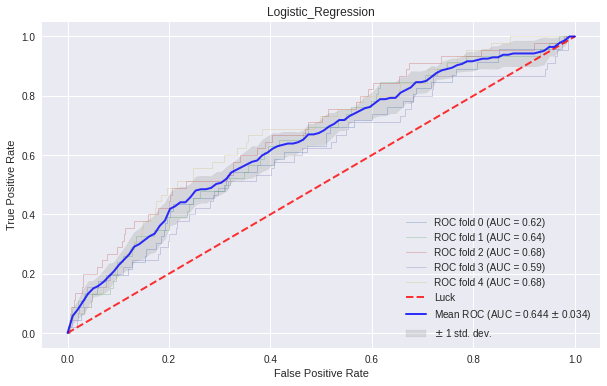

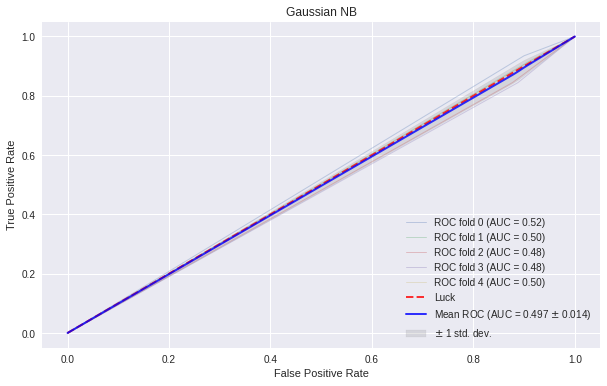

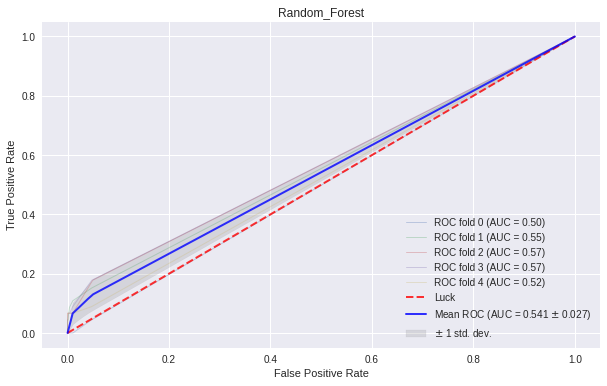

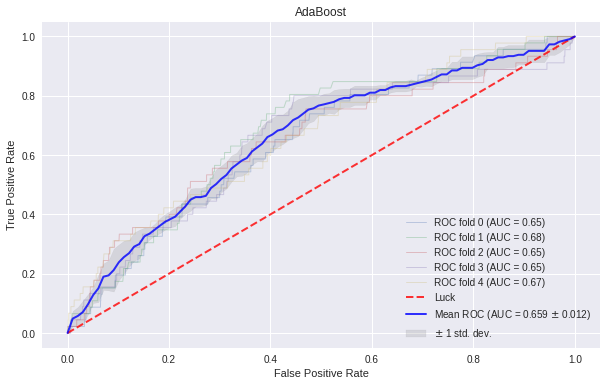

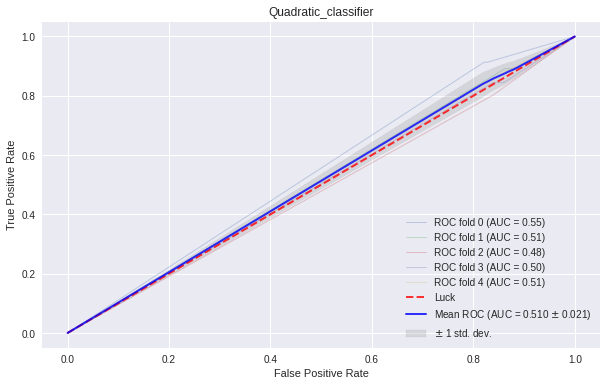

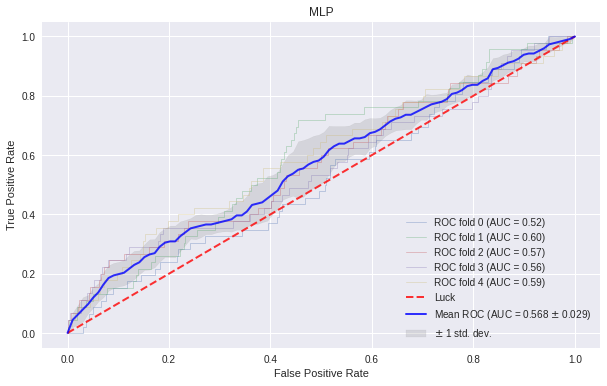

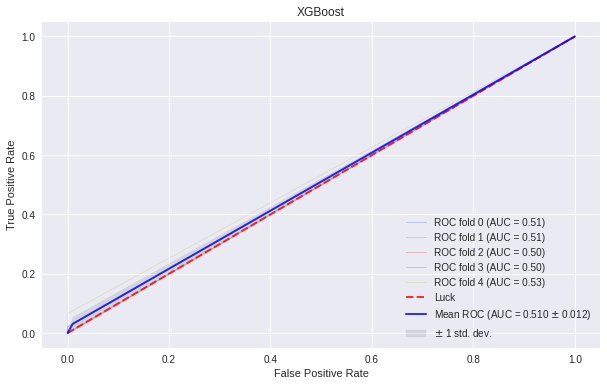

In [37]:
##### Run complete k-fold validation for first train
# initializing variables for K-fold validation
splits = 5
repeats = 3
classifiers_to_compute = {'Logistic_Regression': clf_1, 'Gaussian NB': clf_2, 'Random_Forest': clf_3, 
                          'AdaBoost': clf_4,'Quadratic_classifier': clf_5, 'MLP': clf_6, 'XGBoost': clf_7}


# initializaing K-fold validation
kfolds = RepeatedStratifiedKFold(n_splits = splits, n_repeats=repeats, random_state = seed)

metric_store = [] # store classifier metrics
scores = [] # store UAC score results from k-fold validation

for idx,clf in enumerate(classifiers_to_compute):
    
    roc_curve_inputs = {}
    fprs = [] 
    tprs = []
    
    for (train, test), i in zip(kfolds.split(X_train, y_train), range(splits)):
        classifiers_to_compute[clf].fit(X_train.iloc[train], y_train.iloc[train])
        _, _, auc_score_train, _ = compute_roc_auc_dense(classifiers_to_compute[clf], clf, train)
        fpr, tpr, auc_score, metrics = compute_roc_auc_dense(classifiers_to_compute[clf], clf, test)
        scores.append((auc_score_train, auc_score, clf))
        fprs.append(fpr)
        tprs.append(tpr)
        metric_store.append(metrics)

    plot_roc_curve(fprs, tprs, clf)

In [38]:
# Define dfs with k-fold validation results for the first train
confusion_matrix_scores_first_train = pd.DataFrame(metric_store, columns = ['classifier','auc', 'accuracy', 'recall', 'precision', 'f1'])
final_scores_K_fold_first_train =  pd.DataFrame(scores, columns=['AUC Train', 'AUC Test', 'classifier'])

# export to csv
for df in [('confusion_matrix_scores_first_train',confusion_matrix_scores_first_train), ('final_scores_K_fold_first_train',final_scores_K_fold_first_train)]:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

#### 4.1.1 Compiling first training results

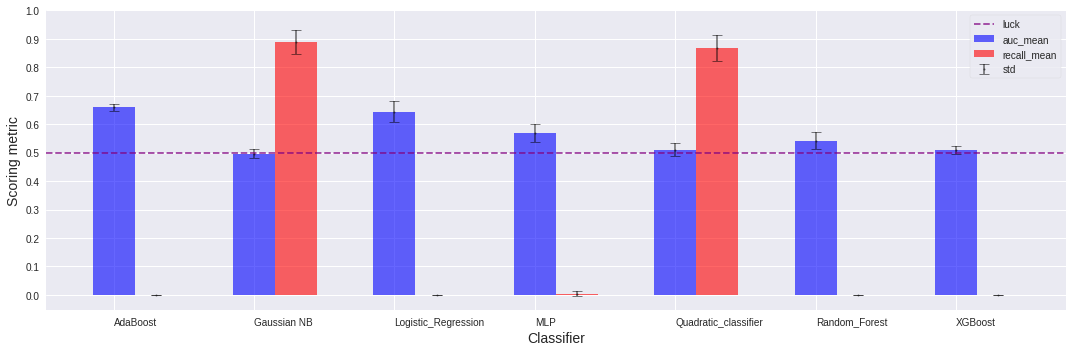

In [72]:
### Set up for plotting
fig, axs = plt.subplots(1,1, figsize=(15, 5)) # Create figure and axes
    
# Define df to plot
confusion_matrix_scores_first_train = pd.read_csv(path_tuning + 'confusion_matrix_scores_first_train.csv')
classfiers_first_train = confusion_matrix_scores_first_train.groupby(['classifier'], as_index=False).agg(['mean','std']).reset_index().droplevel(1, axis=1)
classfiers_first_train.columns = ['classifier','auc_mean', 'auc_std', 'acc_mean', 'acc_std', 'recall_mean', 'recall_std', 'pre_mean', 'pre_std', 'f1_mean', 'f1_std']
                
x1_pos = np.arange(len(classfiers_first_train))
x2_pos = [x+bar_width for x in x1_pos]
x_axis = classfiers_first_train['classifier'].unique().tolist()
baseline = 0.5

auc_mean = classfiers_first_train.iloc[:,1]
auc_std = classfiers_first_train.iloc[:,2]
recall_mean = classfiers_first_train.iloc[:,5]
recall_std = classfiers_first_train.iloc[:,6]
                        
axs.bar(x1_pos, auc_mean, color= colors['c1'][0], label = 'auc_mean', width = bar_width, alpha = 0.6)
axs.bar(x2_pos, recall_mean, color = colors['c1'][1], label = 'recall_mean', width = bar_width, alpha = 0.6)
axs.errorbar(x1_pos, auc_mean, auc_std, fmt='.', color = 'black', label = 'std' , capthick=1, alpha=0.5, ms=4, capsize=5)
axs.errorbar(x2_pos, recall_mean, recall_std, fmt='.', color = 'black', capthick=1, alpha=0.5, ms=4, capsize=5)
axs.axhline(y=baseline, xmin = min(x1_pos), xmax = max(x1_pos),color = colors['c2'][3],label = 'luck' ,alpha=0.75, linestyle = '--' )

# Plot configuration
axs.set_xticks(x1_pos)
axs.set_xlabel('Classifier', fontsize = size['label']) # xlabel name
axs.set_ylabel('Scoring metric', fontsize = size['label']) # ylabel name
axs.legend(loc = 'upper right', frameon = True)
axs.yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
axs.set_yticks(np.arange(0, 1.1, 0.1))
axs.set_xticklabels(x_axis, rotation = 0, fontsize = size['tick'], horizontalalignment = 'left')
axs.tick_params(axis = 'both', which = 'major', labelsize = size['tick'])


plt.tight_layout(w_pad=2.5, h_pad=0.1)
plt.show()

### 4.2 Second k-fold validation train

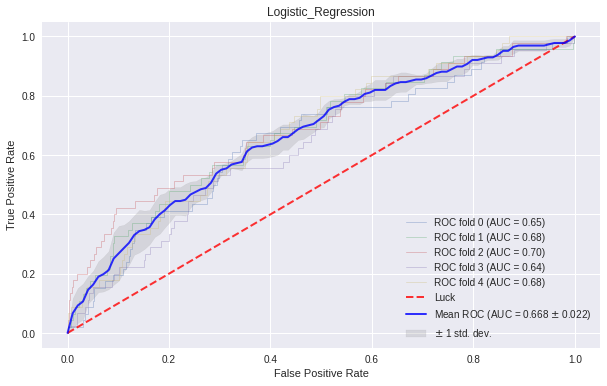

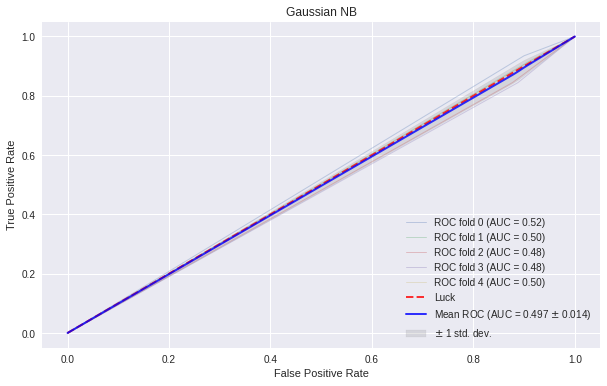

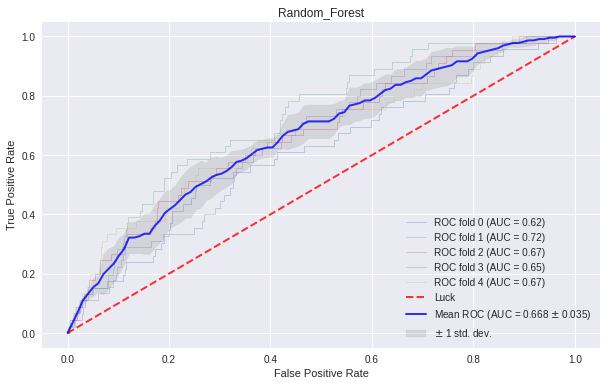

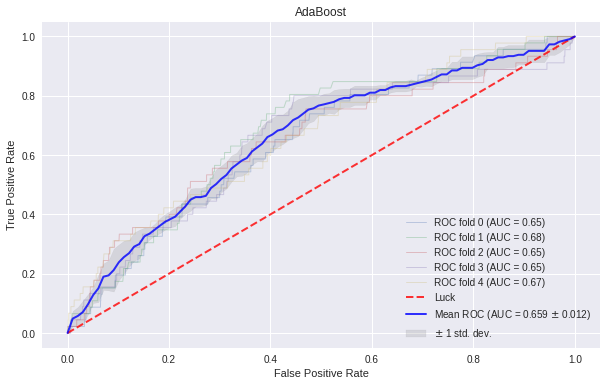

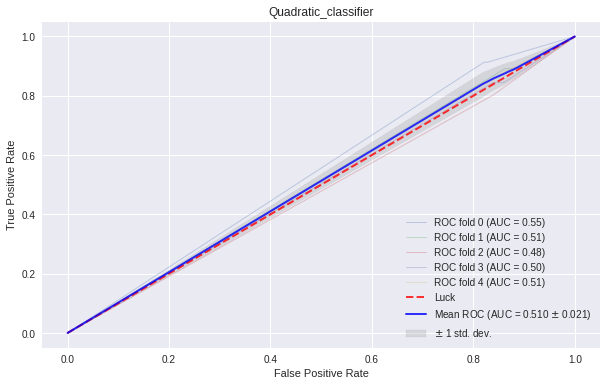

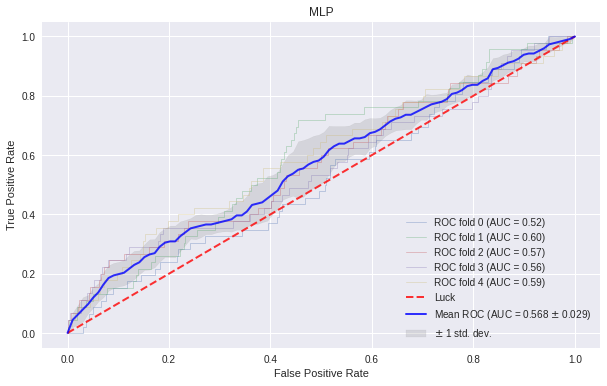

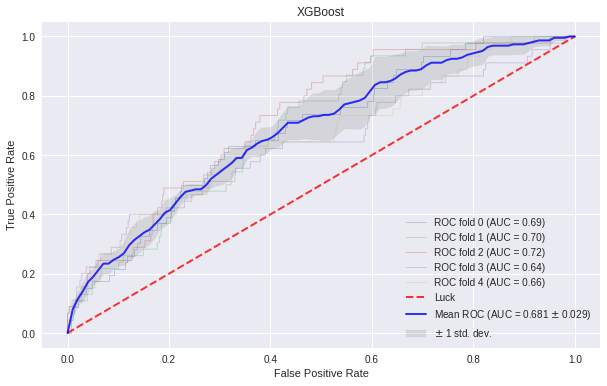

In [73]:
##### Run complete k-fold validation for second train

# initializing variables for K-fold validation
splits = 5
repeats = 3
classifiers_to_compute = {'Logistic_Regression': clf_1_tuned, 'Gaussian NB': clf_2, 'Random_Forest': clf_3_tuned, 
                          'AdaBoost': clf_4_tuned,'Quadratic_classifier': clf_5, 'MLP': clf_6, 'XGBoost': clf_7_tuned}

# initializaing K-fold validation
kfolds = RepeatedStratifiedKFold(n_splits = splits, n_repeats=repeats, random_state = seed)

metric_store_tuned = [] # store classifier metrics
scores_tuned = [] # store UAC score results from k-fold validation

for idx,clf in enumerate(classifiers_to_compute):
    
    roc_curve_inputs = {}
    fprs = [] 
    tprs = []
    
    for (train, test), i in zip(kfolds.split(X_train, y_train), range(splits)):
        classifiers_to_compute[clf].fit(X_train.iloc[train], y_train.iloc[train])
        _, _, auc_score_train, _ = compute_roc_auc_dense(classifiers_to_compute[clf], clf, train)
        fpr, tpr, auc_score, metrics = compute_roc_auc_dense(classifiers_to_compute[clf], clf, test)
        scores_tuned.append((auc_score_train, auc_score, clf))
        fprs.append(fpr)
        tprs.append(tpr)
        metric_store_tuned.append(metrics)

    plot_roc_curve(fprs, tprs, clf)

In [74]:
# Define dfs with k-fold validation results for the first train
confusion_matrix_scores_second_train = pd.DataFrame(metric_store_tuned, columns = ['classifier','auc', 'accuracy', 'recall', 'precision', 'f1'])
final_scores_K_fold_second_train =  pd.DataFrame(scores_tuned, columns=['AUC Train', 'AUC Test', 'classifier'])

# export to csv
for df in [('confusion_matrix_scores_second_train',confusion_matrix_scores_second_train), ('final_scores_K_fold_second_train',final_scores_K_fold_second_train)]:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

#### 4.2.1 Compiling second training results

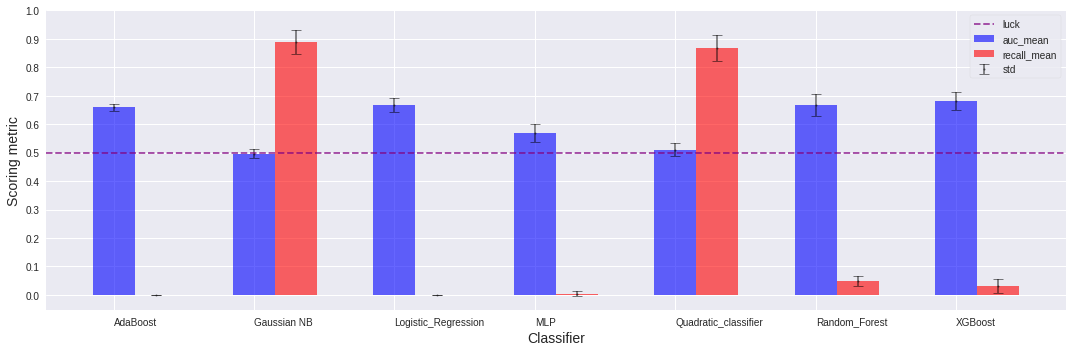

In [75]:
### Set up for plotting
fig, axs = plt.subplots(1,1, figsize=(15, 5)) # Create figure and axes
    
# Define df to plot
confusion_matrix_scores_second_train = pd.read_csv(path_tuning + 'confusion_matrix_scores_second_train.csv')
classfiers_second_train = confusion_matrix_scores_second_train.groupby(['classifier'], as_index=False).agg(['mean','std']).reset_index().droplevel(1, axis=1)
classfiers_second_train.columns = ['classifier','auc_mean', 'auc_std', 'acc_mean', 'acc_std', 'recall_mean', 'recall_std', 'pre_mean', 'pre_std', 'f1_mean', 'f1_std']

                
x1_pos = np.arange(len(classfiers_second_train))
x2_pos = [x+bar_width for x in x1_pos]
x_axis = classfiers_second_train['classifier'].unique().tolist()
baseline = 0.5

auc_mean = classfiers_second_train.iloc[:,1]
auc_std = classfiers_second_train.iloc[:,2]
recall_mean = classfiers_second_train.iloc[:,5]
recall_std = classfiers_second_train.iloc[:,6]
                        
axs.bar(x1_pos, auc_mean, color= colors['c1'][0], label = 'auc_mean', width = bar_width, alpha = 0.6)
axs.bar(x2_pos, recall_mean, color = colors['c1'][1], label = 'recall_mean', width = bar_width, alpha = 0.6)
axs.errorbar(x1_pos, auc_mean, auc_std, fmt='.', color = 'black', label = 'std' , capthick=1, alpha=0.5, ms=4, capsize=5)
axs.errorbar(x2_pos, recall_mean, recall_std, fmt='.', color = 'black', capthick=1, alpha=0.5, ms=4, capsize=5)
axs.axhline(y=baseline, xmin = min(x1_pos), xmax = max(x1_pos),color = colors['c2'][3],label = 'luck' ,alpha=0.75, linestyle = '--' )

# Plot configuration
axs.set_xticks(x1_pos)
axs.set_xlabel('Classifier', fontsize = size['label']) # xlabel name
axs.set_ylabel('Scoring metric', fontsize = size['label']) # ylabel name
axs.legend(loc = 'upper right', frameon = True)
axs.yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
axs.set_yticks(np.arange(0, 1.1, 0.1))
axs.set_xticklabels(x_axis, rotation = 0, fontsize = size['tick'], horizontalalignment = 'left')
axs.tick_params(axis = 'both', which = 'major', labelsize = size['tick'])


plt.tight_layout(w_pad=2.5, h_pad=0.1)
plt.show()

# 5. Generalization

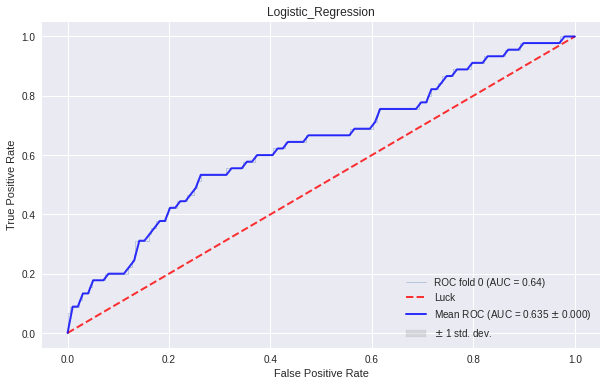

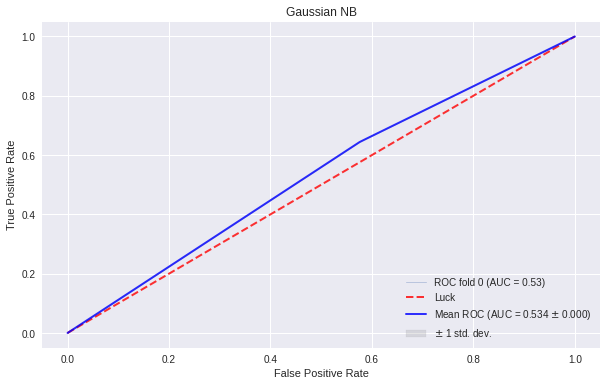

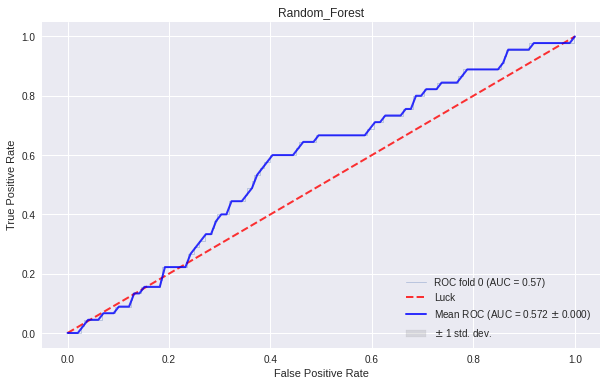

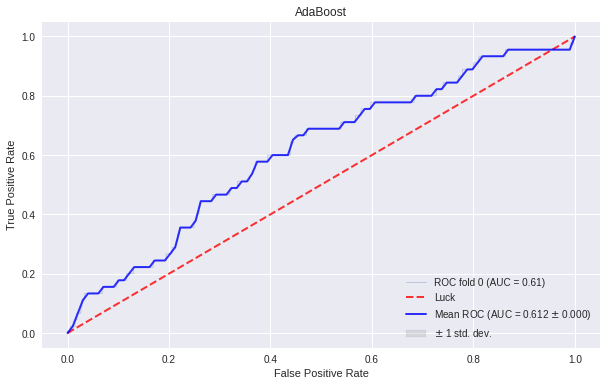

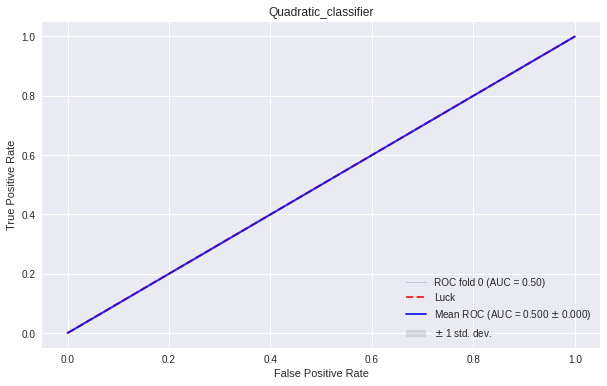

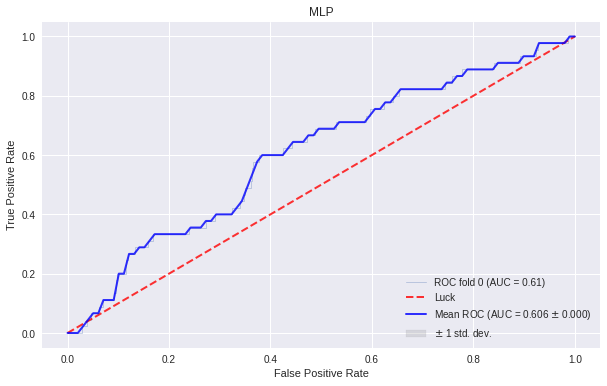

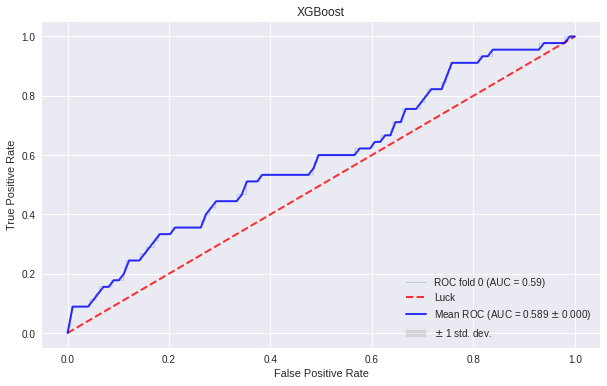

In [76]:
##### Run complete k-fold validation for second train

# initializing classifier list
classifiers_to_compute = {'Logistic_Regression': clf_1_tuned, 'Gaussian NB': clf_2, 'Random_Forest': clf_3_tuned, 
                          'AdaBoost': clf_4_tuned,'Quadratic_classifier': clf_5, 'MLP': clf_6, 'XGBoost': clf_7_tuned}

metric_store_test = [] # store classifier metrics

for idx,clf in enumerate(classifiers_to_compute):

    roc_curve_inputs = {}
    fprs = [] 
    tprs = []

    classifiers_to_compute[clf].fit(X_test, y_test)
    fpr, tpr, auc_score, metrics = compute_roc_auc_dense(classifiers_to_compute[clf], clf, test)
    fprs.append(fpr)
    tprs.append(tpr)
    metric_store_test.append(metrics)

    plot_roc_curve(fprs, tprs, clf)

In [51]:
# Define dfs with k-fold validation results for the first train
confusion_matrix_scores_test = pd.DataFrame(metric_store_test, columns = ['classifier','auc', 'accuracy', 'recall', 'precision', 'f1'])

# export to csv
for df in [('confusion_matrix_scores_test',confusion_matrix_scores_test)]:
    df[1].to_csv(path_tuning + df[0]+'.csv', index = True, index_label = False)

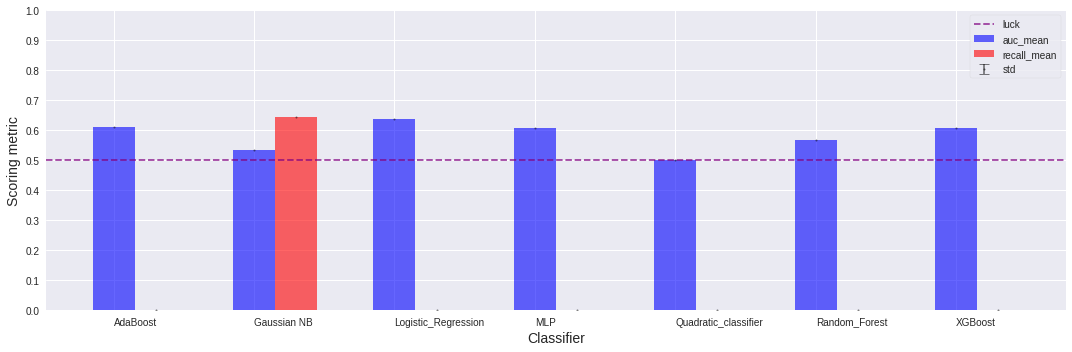

In [52]:
### Set up for plotting
fig, axs = plt.subplots(1,1, figsize=(15, 5)) # Create figure and axes
    
# Define df to plot
confusion_matrix_scores_test = pd.read_csv(path_tuning + 'confusion_matrix_scores_test.csv')
classfiers_test = confusion_matrix_scores_test.groupby(['classifier'], as_index=False).agg(['mean','std']).reset_index().droplevel(1, axis=1)
classfiers_test.columns = ['classifier','auc_mean', 'auc_std', 'acc_mean', 'acc_std', 'recall_mean', 'recall_std', 'pre_mean', 'pre_std', 'f1_mean', 'f1_std']

                
x1_pos = np.arange(len(classfiers_test))
x2_pos = [x+bar_width for x in x1_pos]
x_axis = classfiers_test['classifier'].unique().tolist()
baseline = 0.5
# baseline_rec = results_base_df.iloc[2][0]

auc_mean = classfiers_test.iloc[:,1]
auc_std = classfiers_test.iloc[:,2]
recall_mean = classfiers_test.iloc[:,5]
recall_std = classfiers_test.iloc[:,6]
                        
axs.bar(x1_pos, auc_mean, color= colors['c1'][0], label = 'auc_mean', width = bar_width, alpha = 0.6)
axs.bar(x2_pos, recall_mean, color = colors['c1'][1], label = 'recall_mean', width = bar_width, alpha = 0.6)
axs.errorbar(x1_pos, auc_mean, auc_std, fmt='.', color = 'black', label = 'std' , capthick=1, alpha=0.5, ms=4, capsize=5)
axs.errorbar(x2_pos, recall_mean, recall_std, fmt='.', color = 'black', capthick=1, alpha=0.5, ms=4, capsize=5)
axs.axhline(y=baseline, xmin = min(x1_pos), xmax = max(x1_pos),color = colors['c2'][3],label = 'luck' ,alpha=0.75, linestyle = '--' )

# Plot configuration
axs.set_xticks(x1_pos)
axs.set_xlabel('Classifier', fontsize = size['label']) # xlabel name
axs.set_ylabel('Scoring metric', fontsize = size['label']) # ylabel name
axs.legend(loc = 'upper right', frameon = True)
axs.yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
axs.set_yticks(np.arange(0, 1.1, 0.1))
axs.set_xticklabels(x_axis, rotation = 0, fontsize = size['tick'], horizontalalignment = 'left')
axs.tick_params(axis = 'both', which = 'major', labelsize = size['tick'])


plt.tight_layout(w_pad=2.5, h_pad=0.1)
plt.show()

## 5. Compiled Classifier Methods Results

### 5.1 Without class imbalance or regularization

In [24]:
# Without class imbalance or regulariozation

# cross validation (mean and sd)
first_iter_scores_val = pd.read_csv(path_tuning + 'confusion_matrix_scores_second_train.csv')
first_iter_scores_val = first_iter_scores_val.groupby(['classifier'], as_index=False).agg(['mean','std']).reset_index().droplevel(1, axis=1)
first_iter_scores_val.columns = ['classifier','auc_mean', 'auc_std', 'accuracy_mean', 'accuracy_std', 'recall_mean', 'recall_std', 'pre_mean', 'pre_std', 'f1_mean', 'f1_std']
first_iter_scores_val['iteration'] = 'without class imbalance or regularization'
first_iter_scores_val['results_category'] = 'validation'

# generalization
first_iter_scores_test = pd.read_csv(path_tuning + 'confusion_matrix_scores_test.csv')
first_iter_scores_test = first_iter_scores_test.groupby(['classifier'], as_index=False).agg(['mean','std']).reset_index().droplevel(1, axis=1)
first_iter_scores_test.columns = ['classifier','auc_mean', 'auc_std', 'accuracy_mean', 'accuracy_std', 'recall_mean', 'recall_std', 'pre_mean', 'pre_std', 'f1_mean', 'f1_std']
first_iter_scores_test['iteration'] = 'without class imbalance or regularization'
first_iter_scores_test['results_category'] = 'test'

# merge dfs
first_iter = pd.concat([first_iter_scores_val,first_iter_scores_test], axis = 0)
first_iter_final = first_iter.pivot(index=['iteration','classifier'], columns=['results_category']).fillna('-')

first_iter_final

auc_mean  \
results_category                                                    test   
iteration                                 classifier                       
without class imbalance or regularization AdaBoost              0.612189   
                                          Gaussian NB           0.534111   
                                          Logistic_Regression   0.636232   
                                          MLP                   0.605769   
                                          Quadratic_classifier  0.499800   
                                          Random_Forest         0.568691   
                                          XGBoost               0.606991   

                                                                           \
results_category                                               validation   
iteration                                 classifier                        
without class imbalance or regularization AdaBoost               0.659082   
                                          Gaussian NB            0.496668   
                                          Logistic_Regression    0.668238   
                                          MLP                    0.567883   
                                          Quadratic_classifier   0.510272   
                                          Random_Forest          0.667342   
                                          XGBoost                0.681298   

                                                               auc_std  \
results_category                                                  test   
iteration                                 classifier                     
without class imbalance or regularization AdaBoost                   -   
                                          Gaussian NB                -   
                                          Logistic_Regression        -   
                                          MLP                        -   
                                          Quadratic_classifier       -   
                                          Random_Forest              -   
                                          XGBoost                    -   

                                                                           \
results_category                                               validation   
iteration                                 classifier                        
without class imbalance or regularization AdaBoost               0.013097   
                                          Gaussian NB            0.015825   
                                          Logistic_Regression    0.024596   
                                          MLP                    0.031875   
                                          Quadratic_classifier   0.023292   
                                          Random_Forest          0.038779   
                                          XGBoost                0.032081   

                                                               accuracy_mean  \
results_category                                                        test   
iteration                                 classifier                           
without class imbalance or regularization AdaBoost                  0.999320   
                                          Gaussian NB               0.423924   
                                          Logistic_Regression       0.999335   
                                          MLP                       0.999276   
                                          Quadratic_classifier      0.998936   
                                          Random_Forest             0.999335   
                                          XGBoost                   0.999335   

                                                                           \
results_category                                               validation   
iteration                                 classifier             

### 5.2 Class imbalance treatment

In [23]:
# Class imbalance treatment

# cross validation (mean and sd)
class_balance_iter_scores_val = pd.read_csv(path_tuning + 'confusion_matrix_scores_balance_2.csv')
class_balance_iter_scores_val = class_balance_iter_scores_val.groupby(['classifier'], as_index=False).agg(['mean','std']).reset_index().droplevel(1, axis=1)
class_balance_iter_scores_val.columns = ['classifier','auc_mean', 'auc_std', 'accuracy_mean', 'accuracy_std', 'recall_mean', 'recall_std', 'pre_mean', 'pre_std', 'f1_mean', 'f1_std']
class_balance_iter_scores_val['iteration'] = 'class imbalance methods'
class_balance_iter_scores_val['results_category'] = 'validation'
class_balance_iter_scores_val

# generalization
class_balance_iter_scores_test = pd.read_csv(path_tuning + 'confusion_matrix_scores_test_balance.csv')
class_balance_iter_scores_test = class_balance_iter_scores_test.groupby(['classifier'], as_index=False).agg(['mean','std']).reset_index().droplevel(1, axis=1)
class_balance_iter_scores_test.columns = ['classifier','auc_mean', 'auc_std', 'accuracy_mean', 'accuracy_std', 'recall_mean', 'recall_std', 'pre_mean', 'pre_std', 'f1_mean', 'f1_std']
class_balance_iter_scores_test['iteration'] = 'class imbalance methods'
class_balance_iter_scores_test['results_category'] = 'test'

# merge dfs
class_balance_iter = pd.concat([class_balance_iter_scores_val,class_balance_iter_scores_test], axis = 0)
class_balance_iter_final = class_balance_iter.pivot(index=['iteration','classifier'], columns=['results_category']).fillna('-')

class_balance_iter_final

auc_mean            auc_std  \
results_category                                  test validation    test   
iteration               classifier                                          
class imbalance methods AdaBoost              0.627546   0.997955       -   
                        Gaussian NB           0.441742   0.541784       -   
                        Logistic_Regression   0.625691   0.833222       -   
                        MLP                   0.658244   0.999886       -   
                        Quadratic_classifier  0.503069   0.553291       -   
                        Random_Forest         0.525740   0.999934       -   
                        XGBoost               0.626784   0.998657       -   

                                                        accuracy_mean  \
results_category                             validation          test   
iteration               classifier                                      
class imbalance methods AdaBoost               0.000380      0.666667   
                        Gaussian NB            0.001395      0.438988   
                        Logistic_Regression    0.002708      0.666667   
                        MLP                    0.000073      0.666667   
                        Quadratic_classifier   0.001591      0.668392   
                        Random_Forest          0.000047      0.666667   
                        XGBoost                0.000312      0.666864   

                                                        accuracy_std  \
results_category                             validation         test   
iteration               classifier                                     
class imbalance methods AdaBoost               0.989804            -   
                        Gaussian NB            0.388976            -   
                        Logistic_Regression    0.762382            -   
                        MLP                    0.996904            -   
                        Quadratic_classifier   0.404388            -   
                        Random_Forest          0.997673            -   
                        XGBoost                0.996292            -   

                                                        recall_mean  \
results_category                             validation        test   
iteration               classifier                                    
class imbalance methods AdaBoost               0.001709    0.000000   
                        Gaussian NB            0.001876    0.449490   
                        Logistic_Regression    0.003556    0.000000   
                        MLP                    0.000886    0.000000   
                        Quadratic_classifier   0.002121    0.007100   
                        Random_Forest          0.000579    0.000000   
                        XGBoost                0.000389    0.000592   

                                                        recall_std             \
results_category                             validation       test validation   
iteration               classifier                                              
class imbalance methods AdaBoost               0.970833          -   0.005253   
                        Gaussian NB            1.000000          -   0.000000   
                        Logistic_Regression    0.560538          -   0.010068   
                        MLP                    0.999379          -   0.001389   
                        Quadratic_classifier   1.000000          -   0.000000   
                        Random_Forest          0.993048          -   0.001670   
                        XGBoost                0.993522          -   0.001194   

                                              pre_mean            pre_std  \
results_category                                  test validation    test   
iteration               classifier                                          
class imbalance methods AdaBoost              0.000000   0.998542     

### 5.3 Pearson regularization

In [25]:
# Pearson regularization

# cross validation (mean and sd)
pearson_iter_scores_val = pd.read_csv(path_tuning + 'confusion_matrix_scores_pearson_train.csv')
pearson_iter_scores_val = pearson_iter_scores_val.groupby(['classifier'], as_index=False).agg(['mean','std']).reset_index().droplevel(1, axis=1)
pearson_iter_scores_val.columns = ['classifier','auc_mean', 'auc_std', 'accuracy_mean', 'accuracy_std', 'recall_mean', 'recall_std', 'pre_mean', 'pre_std', 'f1_mean', 'f1_std']
pearson_iter_scores_val['iteration'] = 'pearson regularization'
pearson_iter_scores_val['results_category'] = 'validation'

# generalization
pearson_iter_scores_test = pd.read_csv(path_tuning + 'confusion_matrix_scores_pearson_test.csv')
pearson_iter_scores_test = pearson_iter_scores_test.groupby(['classifier'], as_index=False).agg(['mean','std']).reset_index().droplevel(1, axis=1)
pearson_iter_scores_test.columns = ['classifier','auc_mean', 'auc_std', 'accuracy_mean', 'accuracy_std', 'recall_mean', 'recall_std', 'pre_mean', 'pre_std', 'f1_mean', 'f1_std']
pearson_iter_scores_test['iteration'] = 'pearson regularization'
pearson_iter_scores_test['results_category'] = 'test'

# merge dfs
pearson_iter = pd.concat([pearson_iter_scores_val,pearson_iter_scores_test], axis = 0)
pearson_iter_final = pearson_iter.pivot(index=['iteration','classifier'], columns=['results_category']).fillna('-')

pearson_iter_final

auc_mean            auc_std  \
results_category                                 test validation    test   
iteration              classifier                                          
pearson regularization AdaBoost              0.553350   0.637303       -   
                       Gaussian NB           0.473723   0.508678       -   
                       Logistic_Regression   0.667927   0.686967       -   
                       MLP                   0.679912   0.530467       -   
                       Quadratic_classifier  0.499712   0.522006       -   
                       Random_Forest         0.590269   0.655530       -   
                       XGBoost               0.588771   0.648220       -   

                                                       accuracy_mean  \
results_category                            validation          test   
iteration              classifier                                      
pearson regularization AdaBoost               0.031280      0.999271   
                       Gaussian NB            0.040507      0.504491   
                       Logistic_Regression    0.037737      0.999328   
                       MLP                    0.126911      0.999328   
                       Quadratic_classifier   0.067936      0.998753   
                       Random_Forest          0.022747      0.999194   
                       XGBoost                0.045328      0.999117   

                                                       accuracy_std  \
results_category                            validation         test   
iteration              classifier                                     
pearson regularization AdaBoost               0.999332            -   
                       Gaussian NB            0.144063            -   
                       Logistic_Regression    0.999328            -   
                       MLP                    0.999332            -   
                       Quadratic_classifier   0.987983            -   
                       Random_Forest          0.985727            -   
                       XGBoost                0.999221            -   

                                                       recall_mean             \
results_category                            validation        test validation   
iteration              classifier                                               
pearson regularization AdaBoost               0.000009    0.000000   0.000000   
                       Gaussian NB            0.023544    0.457143   0.873782   
                       Logistic_Regression    0.000014    0.000000   0.000000   
                       MLP                    0.000009    0.000000   0.000000   
                       Quadratic_classifier   0.016821    0.000000   0.028908   
                       Random_Forest          0.002876    0.000000   0.046218   
                       XGBoost                0.000059    0.000000   0.000000   

                                            recall_std            pre_mean  \
results_category                                  test validation     test   
iteration              classifier                                            
pearson regularization AdaBoost                      -   0.000000  0.00000   
                       Gaussian NB                   -   0.093633  0.00062   
                       Logistic_Regression           -   0.000000  0.00000   
                       MLP                           -   0.000000  0.00000   
                       Quadratic_classifier          -   0.028998  0.00000   
                       Random_Forest                 -   0.026547  0.00000   
                       XGBoost                       -   0.000000  0.00000   

                                                       pre_std             \
results_category                            validation    test validation   
iteration              classifier                                           
pearson regularization AdaBoo

### 5.4 Lasso regularization

In [26]:
# Pearson regularization

# cross validation (mean and sd)
lasso_iter_scores_val = pd.read_csv(path_tuning + 'confusion_matrix_scores_lasso_train.csv')
lasso_iter_scores_val = lasso_iter_scores_val.groupby(['classifier'], as_index=False).agg(['mean','std']).reset_index().droplevel(1, axis=1)
lasso_iter_scores_val.columns = ['classifier','auc_mean', 'auc_std', 'accuracy_mean', 'accuracy_std', 'recall_mean', 'recall_std', 'pre_mean', 'pre_std', 'f1_mean', 'f1_std']
lasso_iter_scores_val['iteration'] = 'lasso regularization'
lasso_iter_scores_val['results_category'] = 'validation'

# generalization
lasso_iter_scores_test = pd.read_csv(path_tuning + 'confusion_matrix_scores_lasso_test.csv')
lasso_iter_scores_test = lasso_iter_scores_test.groupby(['classifier'], as_index=False).agg(['mean','std']).reset_index().droplevel(1, axis=1)
lasso_iter_scores_test.columns = ['classifier','auc_mean', 'auc_std', 'accuracy_mean', 'accuracy_std', 'recall_mean', 'recall_std', 'pre_mean', 'pre_std', 'f1_mean', 'f1_std']
lasso_iter_scores_test['iteration'] = 'lasso regularization'
lasso_iter_scores_test['results_category'] = 'test'

#
lasso_iter = pd.concat([lasso_iter_scores_val,lasso_iter_scores_test], axis = 0)
lasso_iter_final = lasso_iter.pivot(index=['iteration','classifier'], columns=['results_category']).fillna('-')

lasso_iter_final

auc_mean            auc_std  \
results_category                               test validation    test   
iteration            classifier                                          
lasso regularization AdaBoost              0.599148   0.659082       -   
                     Gaussian NB           0.520550   0.494913       -   
                     Logistic_Regression   0.636198   0.668448       -   
                     MLP                   0.648899   0.533379       -   
                     Quadratic_classifier  0.500000   0.502226       -   
                     Random_Forest         0.590645   0.683983       -   
                     XGBoost               0.610632   0.710834       -   

                                                     accuracy_mean             \
results_category                          validation          test validation   
iteration            classifier                                                 
lasso regularization AdaBoost               0.013097      0.999335   0.999329   
                     Gaussian NB            0.017814      0.396934   0.087510   
                     Logistic_Regression    0.024520      0.999335   0.999329   
                     MLP                    0.074005      0.999335   0.999329   
                     Quadratic_classifier   0.020785      0.999335   0.132913   
                     Random_Forest          0.036250      0.999335   0.988344   
                     XGBoost                0.038338      0.999320   0.999276   

                                          accuracy_std            recall_mean  \
results_category                                  test validation        test   
iteration            classifier                                                 
lasso regularization AdaBoost                        -   0.000008    0.000000   
                     Gaussian NB                     -   0.013299    0.644444   
                     Logistic_Regression             -   0.000008    0.000000   
                     MLP                             -   0.000008    0.000000   
                     Quadratic_classifier            -   0.022567    0.000000   
                     Random_Forest                   -   0.001794    0.000000   
                     XGBoost                         -   0.000072    0.000000   

                                                     recall_std             \
results_category                          validation       test validation   
iteration            classifier                                              
lasso regularization AdaBoost               0.000000          -   0.000000   
                     Gaussian NB            0.902802          -   0.046460   
                     Logistic_Regression    0.000000          -   0.000000   
                     MLP                    0.000000          -   0.000000   
                     Quadratic_classifier   0.871981          -   0.037348   
                     Random_Forest          0.062029          -   0.050761   
                     XGBoost                0.030918          -   0.019718   

                                           pre_mean            pre_std  \
results_category                               test validation    test   
iteration            classifier                                          
lasso regularization AdaBoost              0.000000   0.000000       -   
                     Gaussian NB           0.000711   0.000663       -   
                     Logistic_Regression   0.000000   0.000000       -   
                     MLP                   0.000000   0.000000       -   
                     Quadratic_classifier  0.000000   0.000675       -   
                     Random_Forest         0.000000   0.003409       -   
                     XGBoost               0.000000   0.333333       -   

                                                      f1_mean             \
results_category                          validation     test validation   
iterat

### 5.4 Final Results Concatenation

In [27]:
classifiers_results = pd.concat([first_iter, class_balance_iter, pearson_iter, lasso_iter], axis = 0)
classifiers_results = classifiers_results.round(3)
classifiers_results

classifiers_results.to_csv(path_tuning + 'classifiers_results.csv', index = True, index_label = False)
classifiers_final = classifiers_results.pivot(index=['iteration','classifier'], columns=['results_category']).fillna('-')
classifiers_final

auc_mean  \
results_category                                                   test   
iteration                                 classifier                      
class imbalance methods                   AdaBoost                0.628   
                                          Gaussian NB             0.442   
                                          Logistic_Regression     0.626   
                                          MLP                     0.658   
                                          Quadratic_classifier    0.503   
                                          Random_Forest           0.526   
                                          XGBoost                 0.627   
lasso regularization                      AdaBoost                0.599   
                                          Gaussian NB             0.521   
                                          Logistic_Regression     0.636   
                                          MLP                     0.649   
                                          Quadratic_classifier    0.500   
                                          Random_Forest           0.591   
                                          XGBoost                 0.611   
pearson regularization                    AdaBoost                0.553   
                                          Gaussian NB             0.474   
                                          Logistic_Regression     0.668   
                                          MLP                     0.680   
                                          Quadratic_classifier    0.500   
                                          Random_Forest           0.590   
                                          XGBoost                 0.589   
without class imbalance or regularization AdaBoost                0.612   
                                          Gaussian NB             0.534   
                                          Logistic_Regression     0.636   
                                          MLP                     0.606   
                                          Quadratic_classifier    0.500   
                                          Random_Forest           0.569   
                                          XGBoost                 0.607   

                                                                           \
results_category                                               validation   
iteration                                 classifier                        
class imbalance methods                   AdaBoost                  0.998   
                                          Gaussian NB               0.542   
                                          Logistic_Regression       0.833   
                                          MLP                       1.000   
                                          Quadratic_classifier      0.553   
                                          Random_Forest             1.000   
                                          XGBoost                   0.999   
lasso regularization                      AdaBoost                  0.659   
                                          Gaussian NB               0.495   
                                          Logistic_Regression       0.668   
                                          MLP                       0.533   
                                          Quadratic_classifier      0.502   
                                          Random_Forest             0.684   
                                          XGBoost                   0.711   
pearson regularization                    AdaBoost                  0.637   
                                          Gaussian NB               0.509   
                                          Logistic_Regression       0.687   
                                          MLP                       0.530   
                                          Quadratic_classifier      0.522   
                                          R

In [28]:
multi_tuples = [( 'auc_mean','validation'),('auc_mean', 'test'),('auc_std', 'validation'),('auc_std', 'test'), ('accuracy_mean', 'validation'),
            ('accuracy_mean', 'test'), ('accuracy_std', 'validation'), ('accuracy_std', 'test'), ('recall_mean', 'validation'),('recall_mean', 'test'),
            ('recall_std', 'validation'), ('recall_std', 'test'), ('pre_mean', 'validation'), ('pre_mean', 'test'), ('pre_std', 'validation'),
            ('pre_std', 'test'), ('f1_mean', 'validation'), ('f1_mean', 'test'), ('f1_std', 'validation'), ('f1_std', 'test')]

multi_cols = pd.MultiIndex.from_tuples(multi_tuples, names=['iteration', 'classifier'])
classifiers_final_ordered = pd.DataFrame(classifiers_final, columns=multi_cols)
classifiers_final_ordered

iteration                                                        auc_mean  \
classifier                                                     validation   
iteration                                 classifier                        
class imbalance methods                   AdaBoost                  0.998   
                                          Gaussian NB               0.542   
                                          Logistic_Regression       0.833   
                                          MLP                       1.000   
                                          Quadratic_classifier      0.553   
                                          Random_Forest             1.000   
                                          XGBoost                   0.999   
lasso regularization                      AdaBoost                  0.659   
                                          Gaussian NB               0.495   
                                          Logistic_Regression       0.668   
                                          MLP                       0.533   
                                          Quadratic_classifier      0.502   
                                          Random_Forest             0.684   
                                          XGBoost                   0.711   
pearson regularization                    AdaBoost                  0.637   
                                          Gaussian NB               0.509   
                                          Logistic_Regression       0.687   
                                          MLP                       0.530   
                                          Quadratic_classifier      0.522   
                                          Random_Forest             0.656   
                                          XGBoost                   0.648   
without class imbalance or regularization AdaBoost                  0.659   
                                          Gaussian NB               0.497   
                                          Logistic_Regression       0.668   
                                          MLP                       0.568   
                                          Quadratic_classifier      0.510   
                                          Random_Forest             0.667   
                                          XGBoost                   0.681   

iteration                                                              \
classifier                                                       test   
iteration                                 classifier                    
class imbalance methods                   AdaBoost              0.628   
                                          Gaussian NB           0.442   
                                          Logistic_Regression   0.626   
                                          MLP                   0.658   
                                          Quadratic_classifier  0.503   
                                          Random_Forest         0.526   
                                          XGBoost               0.627   
lasso regularization                      AdaBoost              0.599   
                                          Gaussian NB           0.521   
                                          Logistic_Regression   0.636   
                                          MLP                   0.649   
                                          Quadratic_classifier  0.500   
                                          Random_Forest         0.591   
                                          XGBoost               0.611   
pearson regularization                    AdaBoost              0.553   
                                          Gaussian NB           0.474   
                                          Logistic_Regression   0.668   
                                          MLP                   0.680   
                                          Quadratic_classifier  0.500   
      

# Appendix

# References

https://www.kaggle.com/code/ynouri/random-forest-k-fold-cross-validation/notebook

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/